##DATA PROCESSING

###Installing and Importing neccessary libraries and data

In [ ]:
!pip install xgboost catboost lightgbm torch tabpfn --quiet
!pip install pytorch-tabnet scikit-learn pandas numpy matplotlib seaborn --quiet
!pip install lime -q

In [1]:
import nbformat

file = "/content/MONTH_ADVANCE_PTB_RISK_PREDICTING_AI_MODEL.ipynb"

nb = nbformat.read(file, as_version=4)

for cell in nb["cells"]:
    if "widgets" in cell.get("metadata", {}):
        del cell["metadata"]["widgets"]

nbformat.write(nb, file)
print("Fixed and saved:", file)


Fixed and saved: /content/MONTH_ADVANCE_PTB_RISK_PREDICTING_AI_MODEL.ipynb


Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import f_classif
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from google.colab import files
import re
import torch
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, roc_curve,auc, confusion_matrix, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from tabpfn import TabPFNClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.colors as mcolors
from sklearn.feature_selection import f_classif
import statsmodels.api as sm
from collections import Counter
from imblearn.combine import SMOTEENN
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Read the CSV file from Google Drive
file_path = '/content/drive/MyDrive/Preterm birth risk factors data collection.csv'
data = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Feature Selection

In [ ]:
print(data.columns)
data.drop(['Education level', 'Smoking','Physical stress', 'Alcohol'], axis=1, inplace=True)
data.head()

Index(['Patient_ID', 'Age', 'Baby position', 'PROM', 'Education level',
       'Residence', 'Twin', 'Gest Hypertension', 'Chronic diseases',
       'Infections', 'APH', 'Uterine problem', 'Smoking', 'Alcohol',
       'Physical stress', 'Anemia', 'FHR Abnormality', 'PTB history',
       'Still birth history', 'Abortion history', 'Gravida',
       'Preclampsia/Eclampsia', 'ANC followup', 'Prev C section', 'Outcome'],
      dtype='object')


,Patient_ID,Age,Baby position,PROM,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,APH,...,Anemia,FHR Abnormality,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,A228592,40,right,no,rural,no,yes,no,no,no,...,yes,no,no,yes,no,3.0,yes,3.0,no,yes
1,A226594,24,right,NaN,rural,no,yes,NaN,no,no,...,no,NaN,no,yes,yes,5.0,yes,4.0,no,yes
2,A042904,26,right,yes,urban,no,yes,no,yes,yes,...,no,no,no,yes,no,2.0,yes,3.0,yes,yes
3,A225423,24,NaN,NaN,urban,NaN,yes,NaN,NaN,yes,...,yes,NaN,yes,no,yes,5.0,no,4.0,no,yes
4,A971233,23,NaN,no,urban,no,yes,no,NaN,yes,...,no,no,no,no,no,1.0,no,3.0,yes,no


Dropping 'Patient ID'

In [ ]:
data.drop(['Patient_ID',], axis=1, inplace=True)
data.head()

,Age,Baby position,PROM,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,APH,Uterine problem,Anemia,FHR Abnormality,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,right,no,rural,no,yes,no,no,no,no,yes,no,no,yes,no,3.0,yes,3.0,no,yes
1,24,right,NaN,rural,no,yes,NaN,no,no,NaN,no,NaN,no,yes,yes,5.0,yes,4.0,no,yes
2,26,right,yes,urban,no,yes,no,yes,yes,no,no,no,no,yes,no,2.0,yes,3.0,yes,yes
3,24,NaN,NaN,urban,NaN,yes,NaN,NaN,yes,no,yes,NaN,yes,no,yes,5.0,no,4.0,no,yes
4,23,NaN,no,urban,no,yes,no,NaN,yes,NaN,no,no,no,no,no,1.0,no,3.0,yes,no


Checking data shape

##**Dropping late predictors**

In [ ]:
print(data.columns)
data.drop(['PROM', 'Baby position', 'FHR Abnormality','APH' ], axis=1, inplace=True)
data.head()

Index(['Age', 'Baby position', 'PROM', 'Residence', 'Twin',
       'Gest Hypertension', 'Chronic diseases', 'Infections', 'APH',
       'Uterine problem', 'Anemia', 'FHR Abnormality', 'PTB history',
       'Still birth history', 'Abortion history', 'Gravida',
       'Preclampsia/Eclampsia', 'ANC followup', 'Prev C section', 'Outcome'],
      dtype='object')


,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,rural,no,yes,no,no,no,yes,no,yes,no,3.0,yes,3.0,no,yes
1,24,rural,no,yes,NaN,no,NaN,no,no,yes,yes,5.0,yes,4.0,no,yes
2,26,urban,no,yes,no,yes,no,no,no,yes,no,2.0,yes,3.0,yes,yes
3,24,urban,NaN,yes,NaN,NaN,no,yes,yes,no,yes,5.0,no,4.0,no,yes
4,23,urban,no,yes,no,NaN,NaN,no,no,no,no,1.0,no,3.0,yes,no


In [ ]:
data.shape

(1356, 16)

Displaying the first 20 data rows

In [ ]:
data.head(20)

,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,rural,no,yes,no,no,no,yes,no,yes,no,3.0,yes,3.0,no,yes
1,24,rural,no,yes,NaN,no,NaN,no,no,yes,yes,5.0,yes,4.0,no,yes
2,26,urban,no,yes,no,yes,no,no,no,yes,no,2.0,yes,3.0,yes,yes
3,24,urban,NaN,yes,NaN,NaN,no,yes,yes,no,yes,5.0,no,4.0,no,yes
4,23,urban,no,yes,no,NaN,NaN,no,no,no,no,1.0,no,3.0,yes,no
5,40,rural,no,no,yes,yes,no,yes,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes
6,34,NaN,NaN,no,NaN,NaN,no,NaN,yes,no,yes,4.0,NaN,6.0,no,yes
7,28,rural,no,no,NaN,NaN,NaN,no,no,no,yes,6.0,no,3.0,no,yes
8,36,rural,NaN,yes,no,no,yes,NaN,NaN,no,NaN,NaN,yes,3.0,NaN,yes
9,30,rural,no,no,no,yes,no,yes,NaN,yes,NaN,4.0,NaN,4.0,yes,no


###Data encoding

Encoding Yes/No categories to Numbers

In [ ]:
def map_yes_no(val):
    if isinstance(val, str):
        val_lower = val.strip().lower()
        if val_lower == 'yes':
            return 1
        elif val_lower == 'no':
            return 0
    return val  # leave NaN or other values as-is

for col in data.columns:
    if data[col].dtype == 'object' and (
        data[col].str.lower().str.contains('yes', na=False).any() or
        data[col].str.lower().str.contains('no', na=False).any()
    ):
        data[col] = data[col].apply(map_yes_no)

data.head()


,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,rural,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,0.0,1
1,24,rural,0.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,5.0,1.0,4.0,0.0,1
2,26,urban,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,1
3,24,urban,NaN,1.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,5.0,0.0,4.0,0.0,1
4,23,urban,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0


Encoding Right/Wrong into Numbers

In [ ]:
# Find columns that contain 'right' or 'wrong'
columns_to_convert = []
for col in data.columns:
     if data[col].dtype == 'object':
         # Check if the column contains 'right' or 'wrong' (case-insensitive)
         if data[col].str.lower().str.contains('right').any() or data[col].str.lower().str.contains('wrong').any():
             columns_to_convert.append(col)

# # Convert 'right' to 0 and 'wrong' to 1 in the identified columns
for col in columns_to_convert:
     data[col] = data[col].str.lower().replace({'right': 0, 'wrong': 1})
     # Convert the column to numeric type after replacement
     data[col] = pd.to_numeric(data[col], errors='coerce')

data.head()

,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,rural,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,0.0,1
1,24,rural,0.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,5.0,1.0,4.0,0.0,1
2,26,urban,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,1
3,24,urban,NaN,1.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,5.0,0.0,4.0,0.0,1
4,23,urban,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0


Encoding Urban/Rural into numbers

In [ ]:
# Find columns that contain 'right' or 'wrong'
columns_to_convert = []
for col in data.columns:
     if data[col].dtype == 'object':
         # Check if the column contains 'right' or 'wrong' (case-insensitive)
         if data[col].str.lower().str.contains('rural').any() or data[col].str.lower().str.contains('urban').any():
             columns_to_convert.append(col)

# Convert 'right' to 0 and 'wrong' to 1 in the identified columns
for col in columns_to_convert:
     data[col] = data[col].str.lower().replace({'urban': 0, 'rural': 1})
#     # Convert the column to numeric type after replacement
     data[col] = pd.to_numeric(data[col], errors='coerce')

data.head()

,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,0.0,1
1,24,1.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,5.0,1.0,4.0,0.0,1
2,26,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,1
3,24,0.0,NaN,1.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,5.0,0.0,4.0,0.0,1
4,23,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0


Checking if all data features are encoded

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1356 non-null   int64  
 1   Residence              1355 non-null   float64
 2   Twin                   1335 non-null   float64
 3   Gest Hypertension      1339 non-null   float64
 4   Chronic diseases       1328 non-null   float64
 5   Infections             1335 non-null   float64
 6   Uterine problem        1328 non-null   float64
 7   Anemia                 1347 non-null   float64
 8   PTB history            1284 non-null   float64
 9   Still birth history    1354 non-null   float64
 10  Abortion history       1352 non-null   float64
 11  Gravida                1351 non-null   float64
 12  Preclampsia/Eclampsia  1322 non-null   float64
 13  ANC followup           1245 non-null   float64
 14  Prev C section         1351 non-null   float64
 15  Outc

In [ ]:
# Convert remaining string values to NaN
for col in data.columns:
    if data[col].dtype == 'object':
        # Replace any non-numeric values with NaN
        data[col] = data[col].apply(lambda x: np.nan if isinstance(x, str) else x)

print("Data after converting remaining strings to NaN:")
data.head()

Data after converting remaining strings to NaN:


,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,3.0,0.0,1
1,24,1.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,1.0,5.0,1.0,4.0,0.0,1
2,26,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,1
3,24,0.0,NaN,1.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,5.0,0.0,4.0,0.0,1
4,23,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0


###Data Imptuation

**MICE**

In [ ]:
# Initialize the IterativeImputer (MICE)
# You can adjust max_iter, random_state, and other parameters as needed
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# Apply MICE to the DataFrame
data_imputed_array = mice_imputer.fit_transform(data)

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed_array, columns=data.columns)

# Update the original data DataFrame with the imputed values
data = data_imputed

print("Data after MICE imputation:")
print(data.isnull().sum())
data.head(20)

Data after MICE imputation:
Age                      0
Residence                0
Twin                     0
Gest Hypertension        0
Chronic diseases         0
Infections               0
Uterine problem          0
Anemia                   0
PTB history              0
Still birth history      0
Abortion history         0
Gravida                  0
Preclampsia/Eclampsia    0
ANC followup             0
Prev C section           0
Outcome                  0
dtype: int64


,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40.0,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,0.000000,1.0
1,24.0,1.000000,0.000000,1.0,0.315024,0.000000,0.282686,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,4.000000,0.000000,1.0
2,26.0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.0
3,24.0,0.000000,0.112860,1.0,0.237970,0.641128,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,4.000000,0.000000,1.0
4,23.0,0.000000,0.000000,1.0,0.000000,0.133043,0.003210,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.0
5,40.0,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.561424,0.200056,0.396664,4.865178,1.000000,3.687679,0.335433,1.0
6,34.0,0.321081,0.111909,0.0,0.327560,0.455126,0.000000,0.387946,1.000000,0.000000,1.000000,4.000000,0.430696,6.000000,0.000000,1.0
7,28.0,1.000000,0.000000,0.0,0.241808,0.398800,0.143755,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,3.000000,0.000000,1.0
8,36.0,1.000000,0.122394,1.0,0.000000,0.000000,1.000000,0.457082,0.616958,0.000000,0.381502,4.139753,1.000000,3.000000,0.383913,1.0
9,30.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.187938,1.000000,0.115237,4.000000,0.187163,4.000000,1.000000,0.0


In [ ]:
# Apply absolute value to all numerical columns
# This will make all values positive
for col in data.select_dtypes(include=np.number).columns:
    data[col] = np.abs(data[col])

print("Data after making all values positive:")
data.head(20)

Data after making all values positive:


,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40.0,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,3.000000,0.000000,1.0
1,24.0,1.000000,0.000000,1.0,0.315024,0.000000,0.282686,0.000000,0.000000,1.000000,1.000000,5.000000,1.000000,4.000000,0.000000,1.0
2,26.0,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.0
3,24.0,0.000000,0.112860,1.0,0.237970,0.641128,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,4.000000,0.000000,1.0
4,23.0,0.000000,0.000000,1.0,0.000000,0.133043,0.003210,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.0
5,40.0,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.561424,0.200056,0.396664,4.865178,1.000000,3.687679,0.335433,1.0
6,34.0,0.321081,0.111909,0.0,0.327560,0.455126,0.000000,0.387946,1.000000,0.000000,1.000000,4.000000,0.430696,6.000000,0.000000,1.0
7,28.0,1.000000,0.000000,0.0,0.241808,0.398800,0.143755,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,3.000000,0.000000,1.0
8,36.0,1.000000,0.122394,1.0,0.000000,0.000000,1.000000,0.457082,0.616958,0.000000,0.381502,4.139753,1.000000,3.000000,0.383913,1.0
9,30.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.187938,1.000000,0.115237,4.000000,0.187163,4.000000,1.000000,0.0


In [ ]:
# Convert all numerical columns to integer type after imputation and absolute value
for col in data.select_dtypes(include=np.number).columns:
    # Handle potential NaN values before converting to integer, e.g., by filling with 0 or rounding and converting
    # For simplicity here, I'll round and then convert, assuming imputation handled most NaNs
    data[col] = np.round(data[col]).astype(int)

print("\nData after converting numerical columns to integers:")
data.head(20)


Data after converting numerical columns to integers:


,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
0,40,1,0,1,0,0,0,1,0,1,0,3,1,3,0,1
1,24,1,0,1,0,0,0,0,0,1,1,5,1,4,0,1
2,26,0,0,1,0,1,0,0,0,1,0,2,1,3,1,1
3,24,0,0,1,0,1,0,1,1,0,1,5,0,4,0,1
4,23,0,0,1,0,0,0,0,0,0,0,1,0,3,1,0
5,40,1,0,0,1,1,0,1,1,0,0,5,1,4,0,1
6,34,0,0,0,0,0,0,0,1,0,1,4,0,6,0,1
7,28,1,0,0,0,0,0,0,0,0,1,6,0,3,0,1
8,36,1,0,1,0,0,1,0,1,0,0,4,1,3,0,1
9,30,1,0,0,0,1,0,1,0,1,0,4,0,4,1,0


In [ ]:
data.describe()

,Age,Residence,Twin,Gest Hypertension,Chronic diseases,Infections,Uterine problem,Anemia,PTB history,Still birth history,Abortion history,Gravida,Preclampsia/Eclampsia,ANC followup,Prev C section,Outcome
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,26.593658,0.404130,0.068584,0.278761,0.091445,0.247788,0.066372,0.219027,0.158555,0.087021,0.142330,2.456490,0.219027,4.995575,0.237463,0.296460
std,5.672430,0.490904,0.252839,0.448555,0.288348,0.431887,0.249023,0.413739,0.365395,0.281969,0.349518,1.458512,0.413739,1.609468,0.425685,0.456865
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000
75%,30.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,0.000000,1.000000
max,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,12.000000,1.000000,1.000000


###Statistical Data Analysis

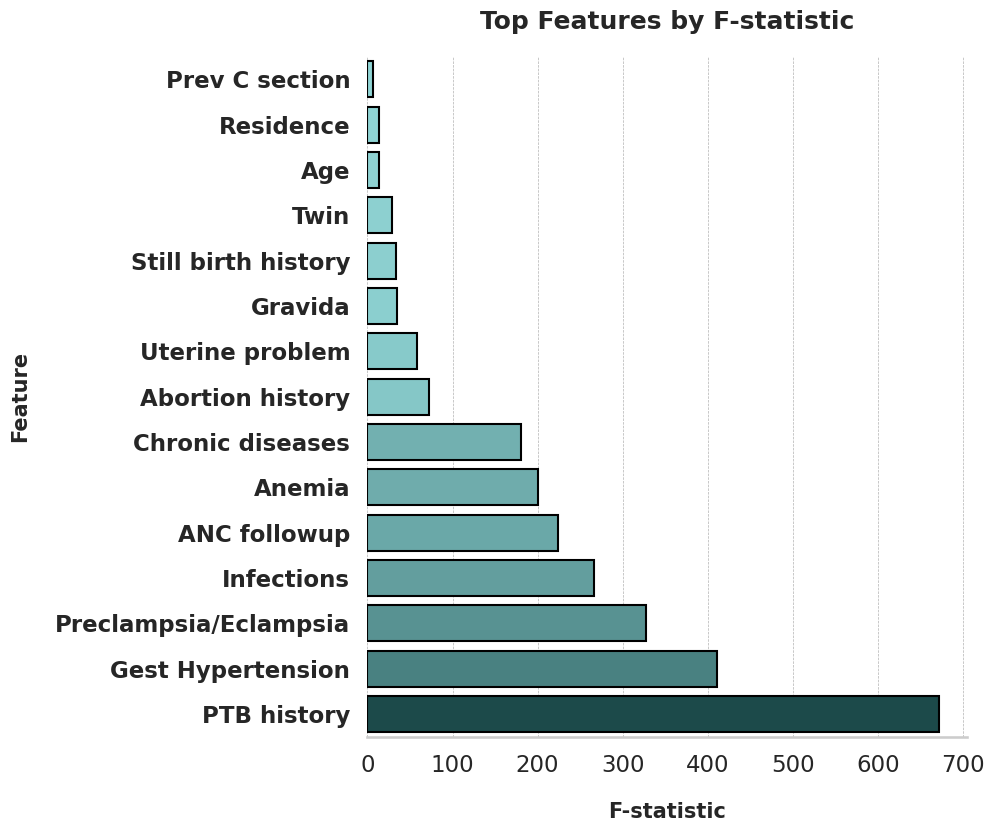

In [ ]:
# -----------------------------
# Data preparation
# -----------------------------
X = data.drop('Outcome', axis=1)
y = data['Outcome']

f_stats, p_values = f_classif(X, y)

f_stats_df = pd.DataFrame({
    'Feature': X.columns,
    'F-statistic': f_stats,
    'P-value': p_values
}).sort_values('F-statistic', ascending=False)

# Clean feature names
def clean_feature_name(name):
    name = name.replace("_", " ")
    name = re.sub(r"\d+$", "", name)
    return name.strip()

f_stats_df["Clean Feature"] = f_stats_df["Feature"].apply(clean_feature_name)

# Special handling for Baby position
f_stats_df["Clean Feature"] = f_stats_df["Clean Feature"].replace({
    "Baby position 0": None,
    "Baby position 2": "Baby position"
})

f_stats_df = f_stats_df[f_stats_df["Clean Feature"].notnull()]
f_stats_df = f_stats_df.drop_duplicates(subset=["Clean Feature"], keep="first")

# -----------------------------
# Visualization
# -----------------------------
sns.set(style="whitegrid", context="talk")

top_n = 15
plot_df = f_stats_df.head(top_n).iloc[::-1]  # reverse for barh

# Normalize F-statistics for color mapping
norm = plt.Normalize(plot_df["F-statistic"].min(), plot_df["F-statistic"].max())

# Custom color gradient from #145252 to #85e0e0
cmap = mcolors.LinearSegmentedColormap.from_list("teal_gradient", ["#85e0e0", "#145252"])

# Map F-statistic values to color gradient
colors = [cmap(norm(val)) for val in plot_df["F-statistic"]]

# Plot
plt.figure(figsize=(10, 8))

ax = sns.barplot(
    x="F-statistic",
    y="Clean Feature",
    data=plot_df,
    palette=colors,
    edgecolor="black"
)

# Titles & labels
ax.set_title("Top Features by F-statistic", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("F-statistic", fontsize=15, fontweight="bold", labelpad=18)
ax.set_ylabel("Feature", fontsize=15, fontweight="bold", labelpad=18)

# Bold y-axis tick labels
ax.set_yticklabels([t.get_text() for t in ax.get_yticklabels()], fontweight="bold")

# Remove spines
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Grid styling
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
ax.yaxis.grid(False)

# Adjust layout
plt.subplots_adjust(left=0.35, right=0.95, top=0.9, bottom=0.05)

# -----------------------------
# Save high-quality figure
# -----------------------------
plt.savefig("f_statistic_gradient_graph.tiff", dpi=600, bbox_inches="tight")
plt.savefig("f_statistic_gradient_feature_importance.png", dpi=600, bbox_inches="tight")

plt.show()

In [ ]:
# -----------------------------
# Display F-statistics table
# -----------------------------
# Prepare and display a clean table of all features

f_stats_table = f_stats_df[["Clean Feature", "F-statistic", "P-value"]] \
    .sort_values("F-statistic", ascending=False)

# Display in full (without index)
print(f_stats_table.to_string(index=False))

        Clean Feature  F-statistic       P-value
          PTB history   671.815375 1.296615e-120
    Gest Hypertension   410.537893  6.141797e-80
Preclampsia/Eclampsia   326.902034  1.270356e-65
           Infections   266.302375  8.626706e-55
         ANC followup   223.768852  6.147865e-47
               Anemia   200.333064  1.619190e-42
     Chronic diseases   180.621356  9.578465e-39
     Abortion history    72.514426  4.345693e-17
      Uterine problem    58.290392  4.249650e-14
              Gravida    35.083644  3.999332e-09
  Still birth history    33.234481  1.010442e-08
                 Twin    28.386766  1.162259e-07
                  Age    13.929489  1.976584e-04
            Residence    13.813796  2.100768e-04
       Prev C section     6.025123  1.422875e-02


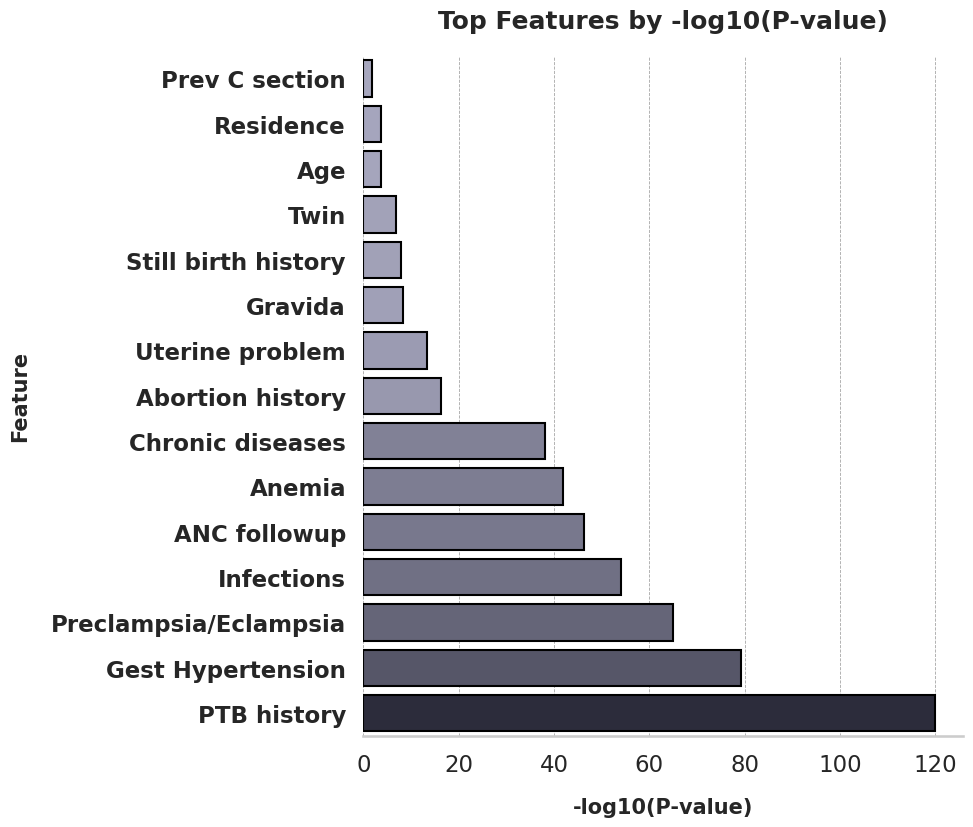

In [ ]:
# -----------------------------
# Feature name cleaning
# -----------------------------
def clean_feature_name(name):
    name = name.replace("_", " ")
    name = re.sub(r"\d+$", "", name)
    return name.strip()

p_values_df = f_stats_df.copy()
p_values_df["Clean Feature"] = p_values_df["Feature"].apply(clean_feature_name)

# Special handling for Baby position
p_values_df["Clean Feature"] = p_values_df["Clean Feature"].replace({
    "Baby position 0": None,
    "Baby position 2": "Baby position"
})

# Drop nulls and duplicates
p_values_df = p_values_df[p_values_df["Clean Feature"].notnull()]
p_values_df = p_values_df.drop_duplicates(subset=["Clean Feature"], keep="first")

# -----------------------------
# -log10 transform of p-values
# -----------------------------
p_values_df["-log10(P-value)"] = -np.log10(p_values_df["P-value"])
p_values_df = p_values_df.sort_values("-log10(P-value)", ascending=False)

# -----------------------------
# Visualization
# -----------------------------
sns.set(style="whitegrid", context="talk")

top_n = 15
plot_df = p_values_df.head(top_n).iloc[::-1]  # reverse for barh

# Normalize values for color mapping
norm = plt.Normalize(plot_df["-log10(P-value)"].min(), plot_df["-log10(P-value)"].max())

# Custom green gradient: from light to dark (low to high significance)
cmap = mcolors.LinearSegmentedColormap.from_list("green_gradient", ["#a3a3c2", "#29293d"])

# Generate color list
colors = [cmap(norm(val)) for val in plot_df["-log10(P-value)"]]

# Plot
plt.figure(figsize=(10, 8))

ax = sns.barplot(
    x="-log10(P-value)",
    y="Clean Feature",
    data=plot_df,
    palette=colors,
    edgecolor="black"
)

# Titles & labels
ax.set_title("Top Features by -log10(P-value)", fontsize=18, fontweight="bold", pad=20)
ax.set_xlabel("-log10(P-value)", fontsize=15, fontweight="bold", labelpad=15)
ax.set_ylabel("Feature", fontsize=15, fontweight="bold", labelpad=15)

# Bold y-axis labels
ax.set_yticklabels([t.get_text() for t in ax.get_yticklabels()], fontweight="bold")

# Remove spines for cleaner look
for spine in ["top", "right", "left"]:
    ax.spines[spine].set_visible(False)

# Grid styling
ax.xaxis.grid(True, linestyle="--", linewidth=0.6, color="gray", alpha=0.7)
ax.yaxis.grid(False)

# Layout spacing
plt.subplots_adjust(left=0.35, right=0.95, top=0.9, bottom=0.05)

# -----------------------------
# Save high-quality figure
# -----------------------------
plt.savefig("p_value.tiff", dpi=600, bbox_inches="tight")
plt.savefig("p_value_feature_significance_log_nature.png", dpi=600, bbox_inches="tight")

plt.show()


In [ ]:
# Prepare a DataFrame with all features and their p-values and cleaned names
all_p_values_table = f_stats_df.copy()
all_p_values_table["Features"] = all_p_values_table["Feature"].apply(clean_feature_name)

# Drop nulls and duplicates on cleaned feature
all_p_values_table = all_p_values_table[all_p_values_table["Features"].notnull()]
all_p_values_table = all_p_values_table.drop_duplicates(subset=["Features"], keep="first")

# Select columns and sort by p-value ascending
all_p_values_table = all_p_values_table[["Features", "P-value"]].sort_values("P-value")
#display the table
print(all_p_values_table.to_string(index=False))

             Features       P-value
          PTB history 1.296615e-120
    Gest Hypertension  6.141797e-80
Preclampsia/Eclampsia  1.270356e-65
           Infections  8.626706e-55
         ANC followup  6.147865e-47
               Anemia  1.619190e-42
     Chronic diseases  9.578465e-39
     Abortion history  4.345693e-17
      Uterine problem  4.249650e-14
              Gravida  3.999332e-09
  Still birth history  1.010442e-08
                 Twin  1.162259e-07
                  Age  1.976584e-04
            Residence  2.100768e-04
       Prev C section  1.422875e-02


###Exploratory Data Analysis

####Univariate

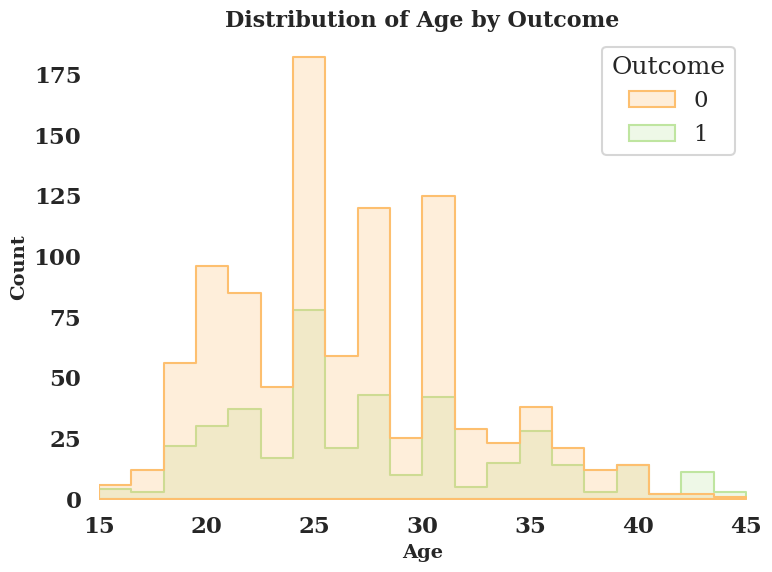

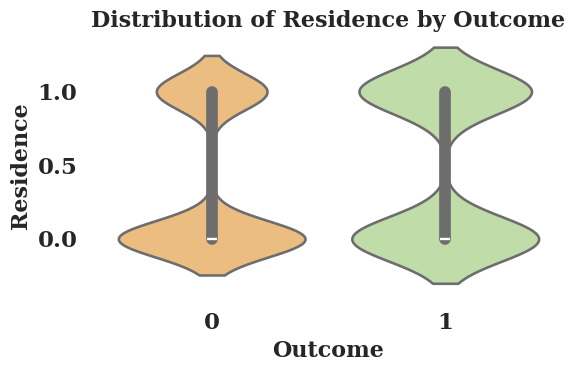

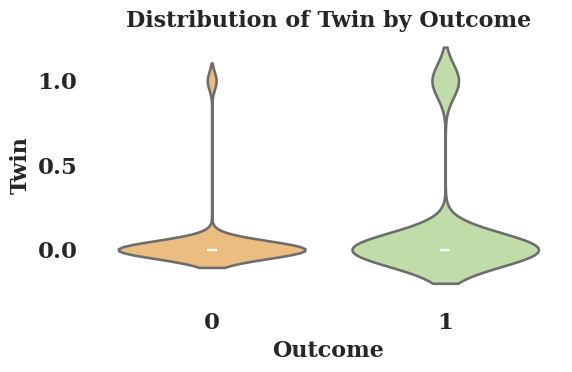

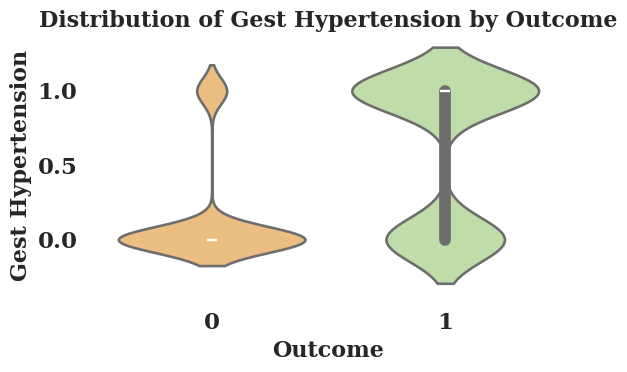

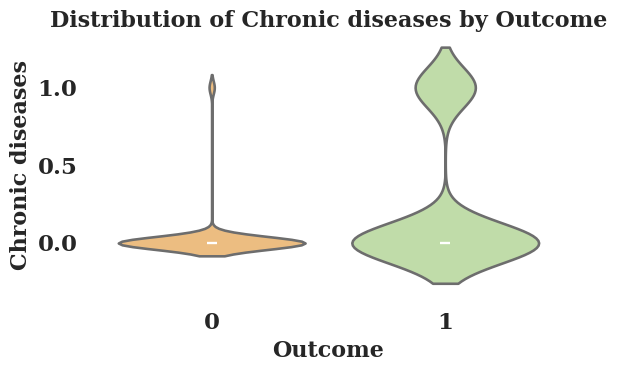

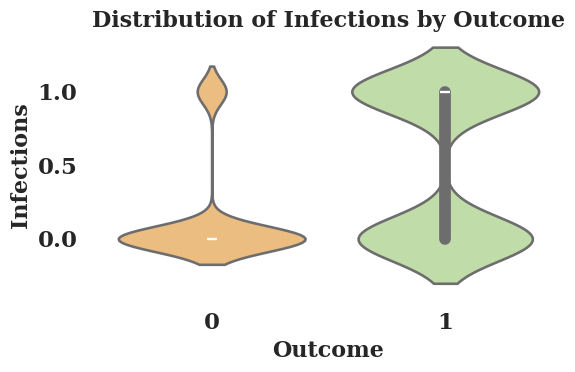

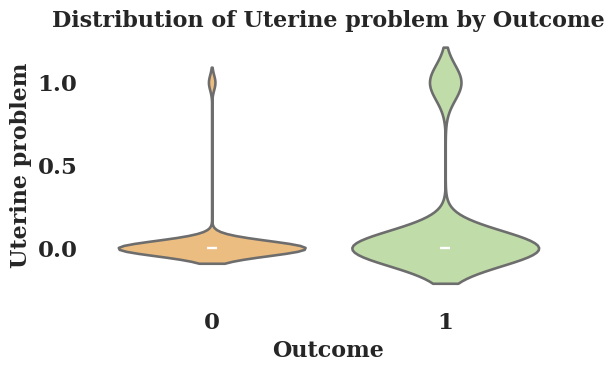

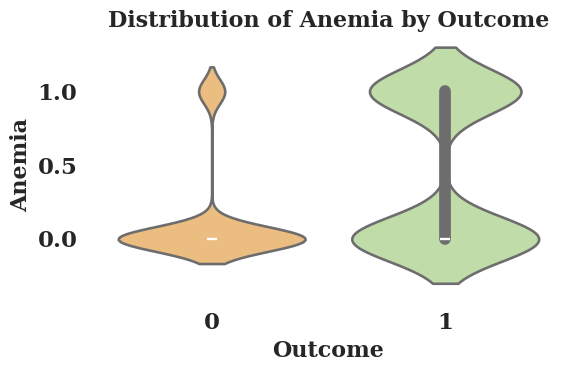

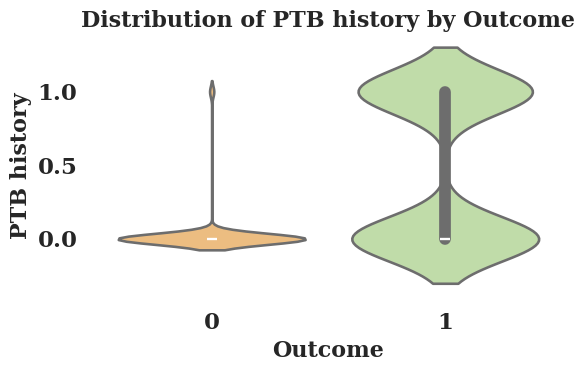

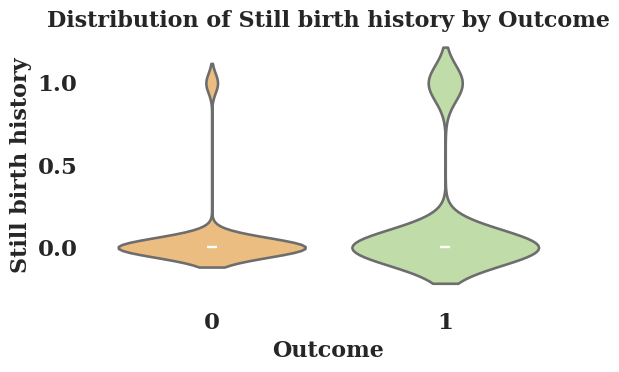

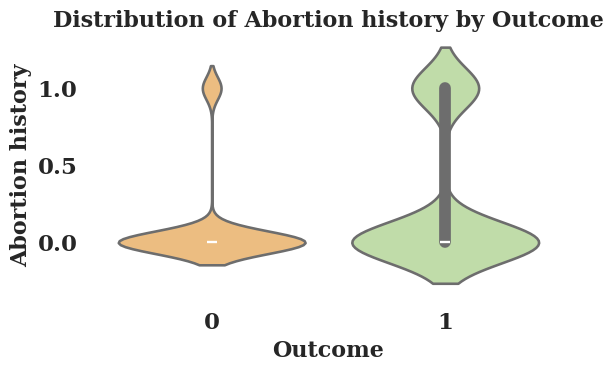

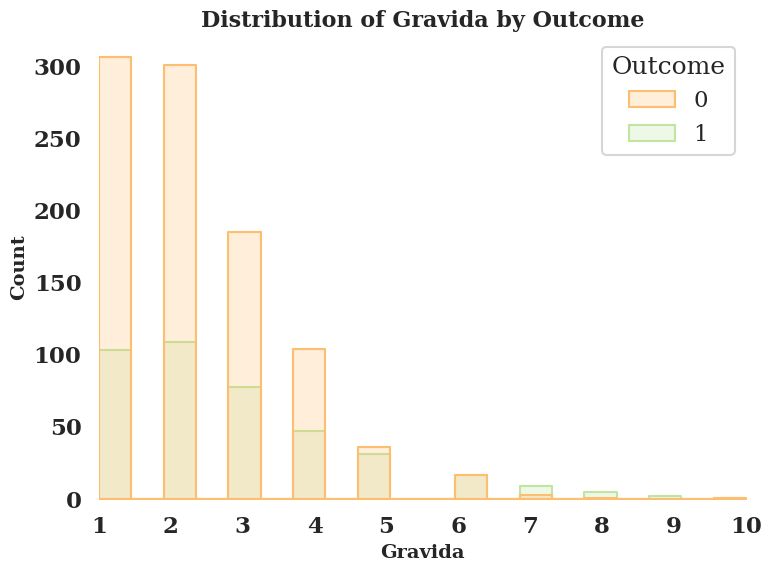

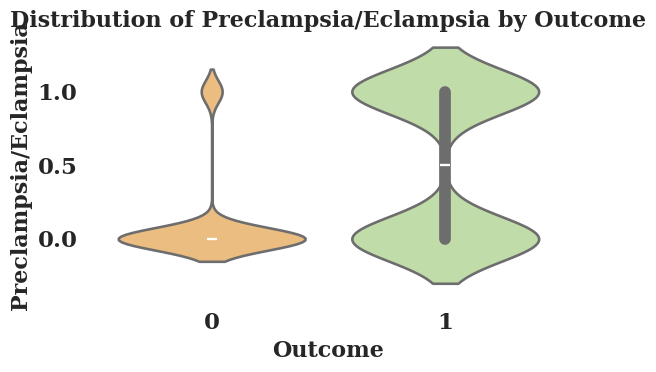

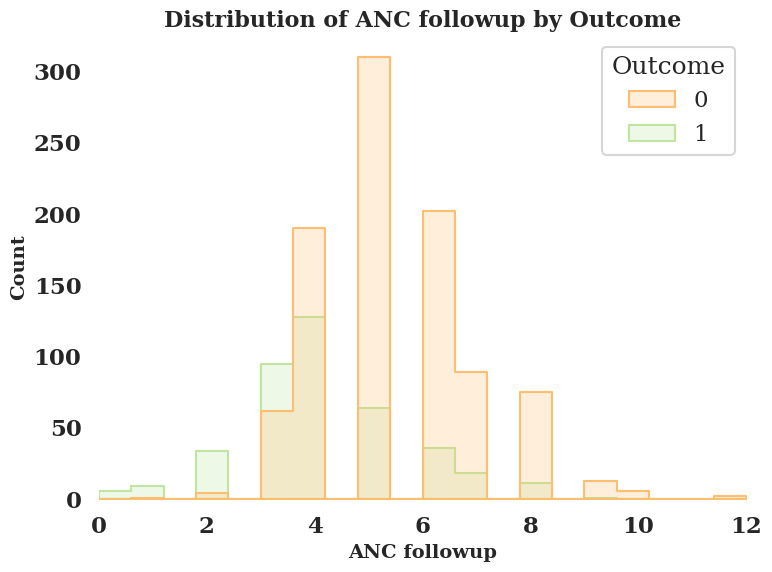

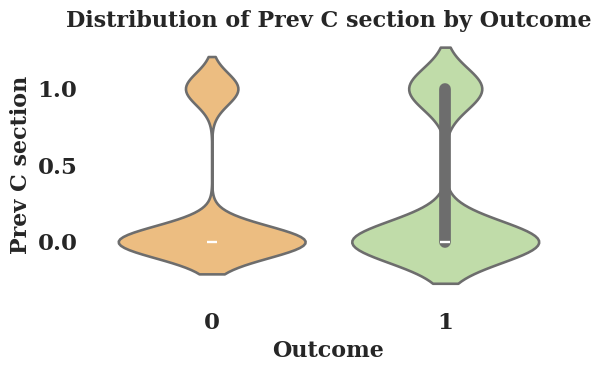

✅ All figures saved in high-quality TIFF format in: feature_vs_outcome_figures


In [ ]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 16,
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold"
})

# --- Create output folder ---
output_dir = "feature_vs_outcome_figures"
os.makedirs(output_dir, exist_ok=True)

# --- Helper to clean filenames ---
def clean_filename(s):
    return re.sub(r'[\\/*?:"<>|,]', "_", s).replace(" ", "_")

# --- Select numerical columns ---
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if "Outcome" in numerical_cols:
    numerical_cols.remove("Outcome")

# ===========================
# Loop through features
# ===========================
for col in numerical_cols:
    unique_vals = data[col].dropna().unique()
    max_val = data[col].max()

    # ---- Case 1: Small-range integer → Violin plot ----
    if np.allclose(unique_vals, unique_vals.astype(int)) and max_val <= 3:
        plt.figure(figsize=(6, 4))
        ax = sns.violinplot(
            x="Outcome",
            y=col,
            data=data,
            palette="Spectral",
            inner="box"  # adds boxplot inside violin
        )
        plt.title(f'Distribution of {col} by Outcome', fontsize=16, fontweight='bold')
        plt.xlabel("Outcome", fontsize=16, fontweight='bold')
        plt.ylabel(col, fontsize=16, fontweight='bold')
        plt.xticks(fontweight='bold')
        plt.yticks(fontweight='bold')
        sns.despine(left=True, bottom=True)
        ax.grid(False)

        fname = os.path.join(output_dir, f"{clean_filename(col)}_violin_vs_outcome.tiff")
        plt.tight_layout()
        plt.show()
        plt.savefig(fname, dpi=600, bbox_inches="tight")
        plt.close()

    # ---- Case 2: Truly continuous → Histogram of counts ----
    else:
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(
            data=data,
            x=col,
            hue="Outcome",
            palette="Spectral",
            element="step",     # outline bars for clarity
            stat="count",       # show counts (not density/mean)
            common_norm=False,
            bins=20
        )

        # Remove categories with 0 counts
        # (only keep ticks where count > 0)
        counts = data.groupby(["Outcome", col]).size().reset_index(name="count")
        nonzero_vals = counts.loc[counts["count"] > 0, col].unique()
        ax.set_xlim(min(nonzero_vals), max(nonzero_vals))

        plt.title(f'Distribution of {col} by Outcome', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=14, fontweight='bold')
        plt.ylabel('Count', fontsize=14, fontweight='bold')
        plt.xticks(fontweight='bold')
        plt.yticks(fontweight='bold')
        sns.despine(left=True, bottom=True)
        ax.grid(False)

        fname = os.path.join(output_dir, f"{clean_filename(col)}_hist_vs_outcome.tiff")
        plt.tight_layout()
        plt.show()
        plt.savefig(fname, dpi=600, bbox_inches="tight")
        plt.close()

print("✅ All figures saved in high-quality TIFF format in:", output_dir)

In [ ]:
import statsmodels.api as sm

# Separate features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Add a constant (intercept) to the feature data
X = sm.add_constant(X)

# Fit a logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Extract Odds Ratios and Confidence Intervals
odds_ratios = pd.DataFrame({
    'OR': result.params,
    'Lower CI': result.conf_int()[0],
    'Upper CI': result.conf_int()[1]
})

# Drop the 'const' row as it's the intercept
odds_ratios = odds_ratios.drop('const')

# Display the results
print("Odds Ratios and 95% Confidence Intervals:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.275201
         Iterations 7
Odds Ratios and 95% Confidence Intervals:
                             OR  Lower CI  Upper CI
Age                   -0.021015 -0.063941  0.021911
Residence             -0.033968 -0.421447  0.353511
Twin                   1.280723  0.594059  1.967387
Gest Hypertension      1.583044  1.170248  1.995840
Chronic diseases       1.828857  1.174251  2.483463
Infections             1.409587  0.986194  1.832980
Uterine problem        1.378148  0.641997  2.114299
Anemia                 1.196787  0.764492  1.629082
PTB history            3.002804  2.403768  3.601840
Still birth history    0.249360 -0.397875  0.896595
Abortion history       0.853989  0.275926  1.432052
Gravida               -0.085849 -0.263750  0.092052
Preclampsia/Eclampsia  1.044300  0.594634  1.493966
ANC followup          -0.425495 -0.559012 -0.291978
Prev C section        -0.045577 -0.512434  0.421281


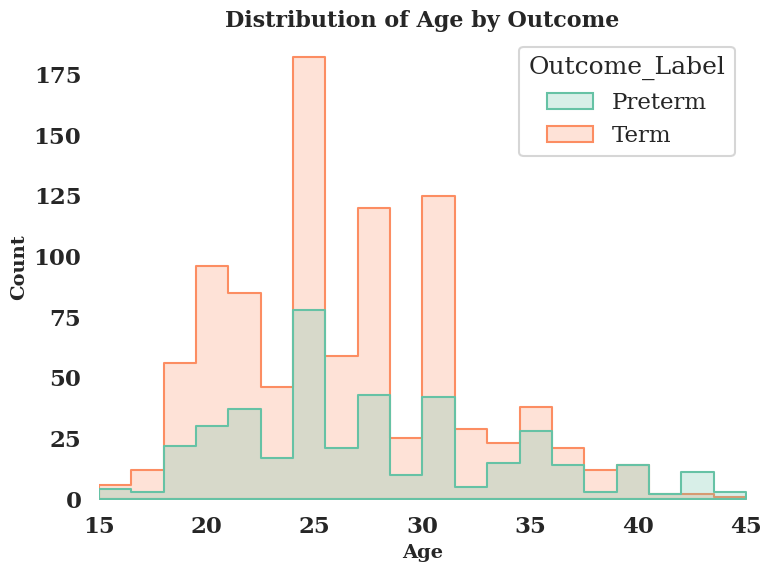

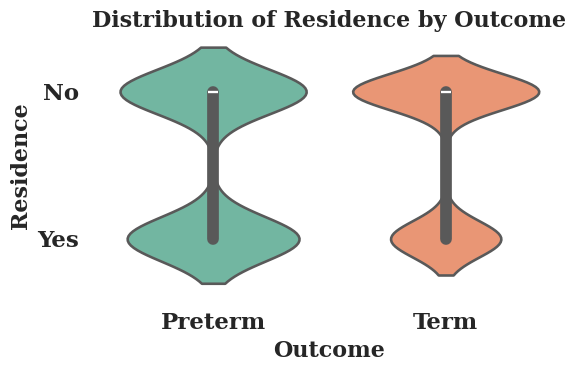

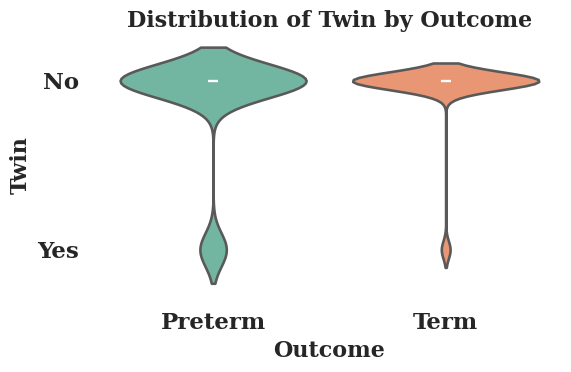

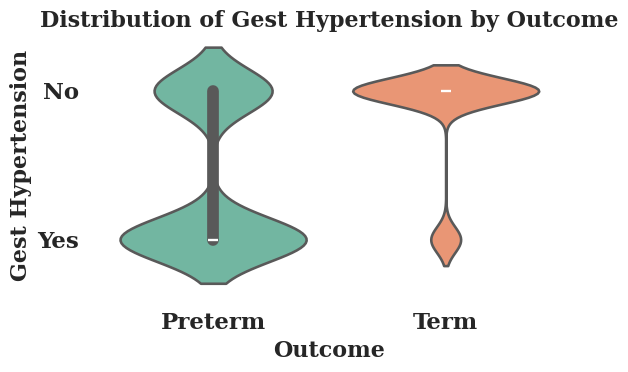

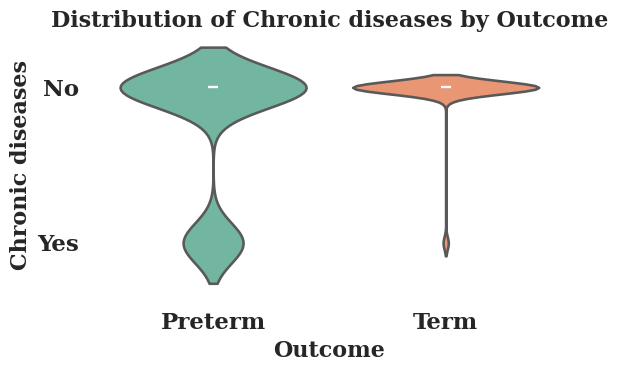

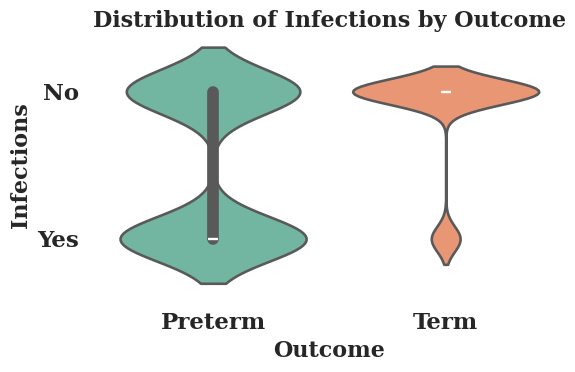

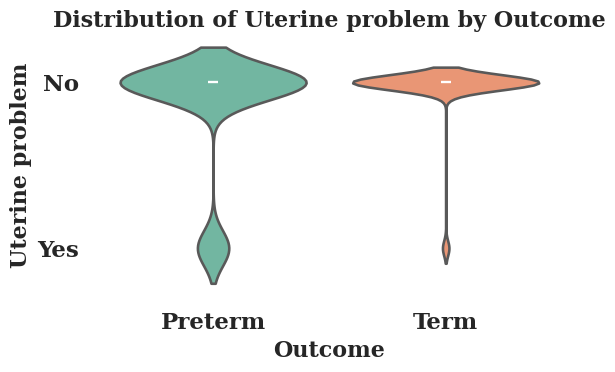

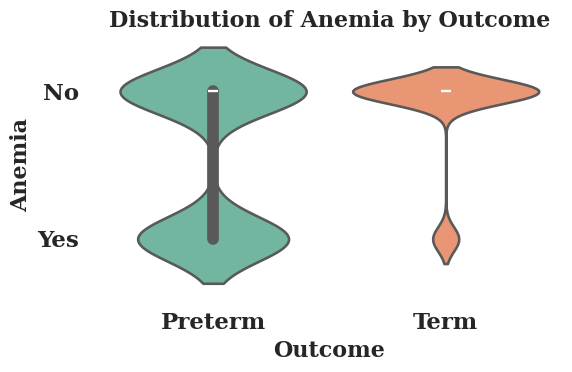

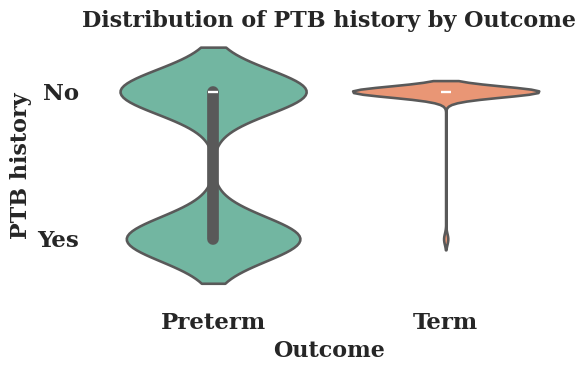

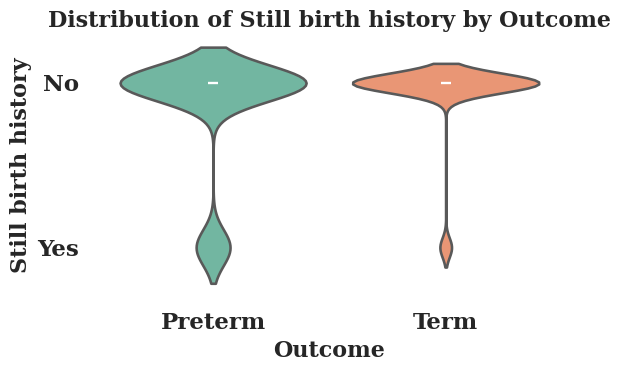

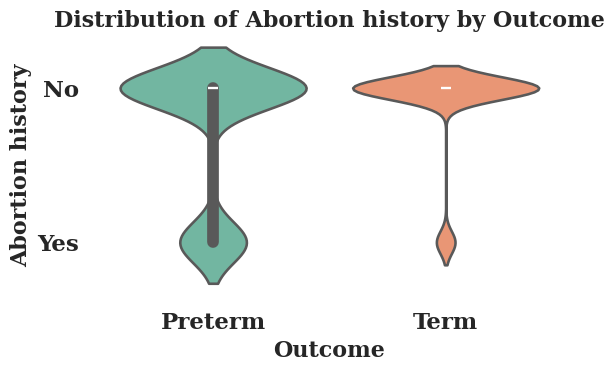

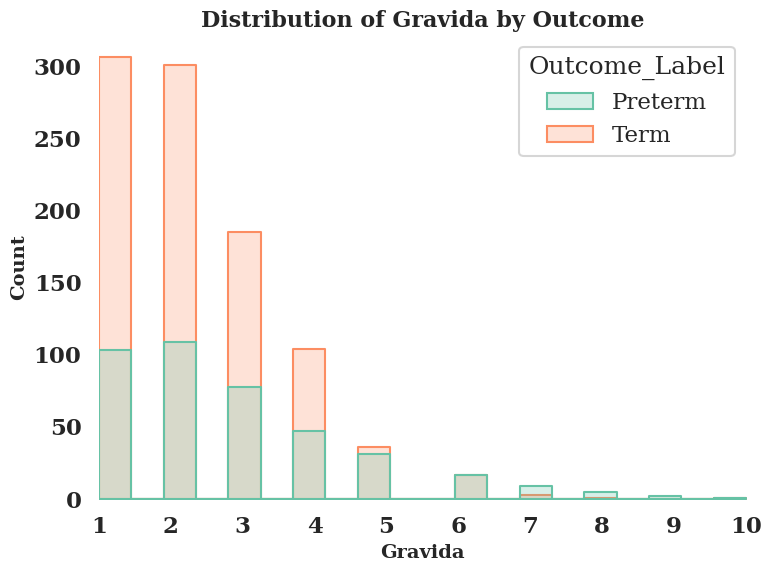

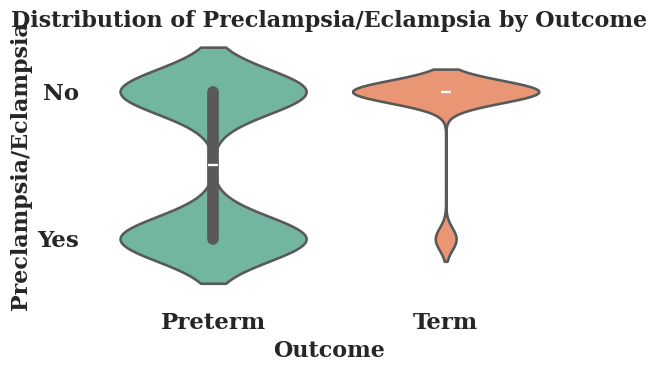

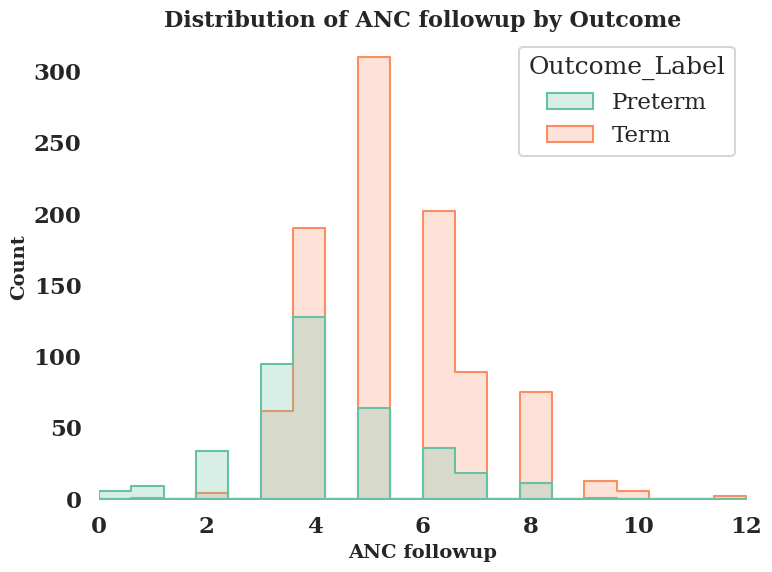

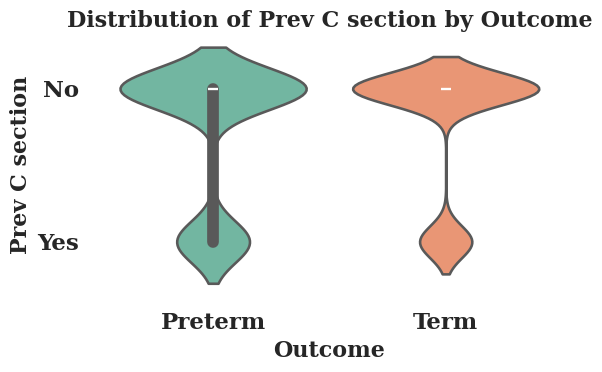

✅ All figures saved in high-quality TIFF format in: feature_vs_outcome_figures


In [ ]:
# ---------------------------------------
# Style for publication-ready figures
# ---------------------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 16,
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold"
})

# ---------------------------------------
# Output directory for figures
# ---------------------------------------
output_dir = "feature_vs_outcome_figures"
os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------
# Helper to clean filenames
# ---------------------------------------
def clean_filename(s):
    return re.sub(r'[\\/*?:"<>|,]', "_", s).replace(" ", "_")

# ---------------------------------------
# Select numeric columns (excluding Outcome)
# ---------------------------------------
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
if "Outcome" in numerical_cols:
    numerical_cols.remove("Outcome")

# ---------------------------------------
# Map outcome labels: 0 → Term, 1 → Preterm
# ---------------------------------------
data_plot = data.copy()
data_plot["Outcome_Label"] = data_plot["Outcome"].map({0: "Term", 1: "Preterm"})

# =======================================
# Generate one plot per numerical feature
# =======================================
for col in numerical_cols:
    unique_vals = data_plot[col].dropna().unique()
    max_val = data_plot[col].max()

    # ---- Case 1: Small-range integer → Violin plot ----
    if np.allclose(unique_vals, unique_vals.astype(int)) and max_val <= 3:

        # For binary variables with only 0 and 1: map y-axis values 0 -> No, 1 -> Yes
        if set(unique_vals).issubset({0, 1}):
            # Filter data to only 0 and 1 (in case of other values)
            df_filtered = data_plot[data_plot[col].isin([0,1])].copy()
            # Map values for plotting
            df_filtered[col + "_label"] = df_filtered[col].map({0: "No", 1: "Yes"})
            # Make it categorical with order to fix plot order
            df_filtered[col + "_label"] = pd.Categorical(df_filtered[col + "_label"], categories=["No", "Yes"])

            plt.figure(figsize=(6, 4))
            ax = sns.violinplot(
                x="Outcome_Label",
                y=col + "_label",
                data=df_filtered,
                palette="Set2",
                inner="box"
            )
            plt.ylabel(col, fontsize=16, fontweight='bold')

            # Explicitly set y-ticks and labels
            ax.set_yticks([0,1])
            ax.set_yticklabels(["No", "Yes"], fontweight='bold')

        else:
            # Use original column if not binary 0/1
            plt.figure(figsize=(6, 4))
            ax = sns.violinplot(
                x="Outcome",
                y=col,
                data=data_plot,
                palette="Set2",
                inner="box"
            )
            plt.ylabel(col, fontsize=16, fontweight='bold')

        # Styling
        plt.title(f'Distribution of {col} by Outcome', fontsize=16, fontweight='bold')
        plt.xlabel("Outcome", fontsize=16, fontweight='bold')
        plt.xticks(fontweight='bold')
        plt.yticks(fontweight='bold')
        sns.despine(left=True, bottom=True)
        ax.grid(False)

        # Save
        fname = os.path.join(output_dir, f"{clean_filename(col)}_violin_vs_outcome.tiff")
        plt.tight_layout()
        plt.savefig(fname, dpi=600, bbox_inches="tight")
        plt.show()
        plt.close()

    # ---- Case 2: Continuous → Histogram with count ----
    else:
        plt.figure(figsize=(8, 6))
        ax = sns.histplot(
            data=data_plot,
            x=col,
            hue="Outcome_Label",
            palette="Set2",
            element="step",       # outline bars
            stat="count",
            bins=20,
            common_norm=False
        )

        # Set X limits based on non-zero counts
        counts = data_plot.groupby(["Outcome", col]).size().reset_index(name="count")
        nonzero_vals = counts.loc[counts["count"] > 0, col].unique()
        if len(nonzero_vals) > 0:
            ax.set_xlim(min(nonzero_vals), max(nonzero_vals))

        # Styling
        plt.title(f'Distribution of {col} by Outcome', fontsize=16, fontweight='bold')
        plt.xlabel(col, fontsize=14, fontweight='bold')
        plt.ylabel('Count', fontsize=14, fontweight='bold')
        plt.xticks(fontweight='bold')
        plt.yticks(fontweight='bold')
        sns.despine(left=True, bottom=True)
        ax.grid(False)

        # Save
        fname = os.path.join(output_dir, f"{clean_filename(col)}_hist_vs_outcome.tiff")
        plt.tight_layout()
        plt.savefig(fname, dpi=600, bbox_inches="tight")
        plt.show()
        plt.close()

print("✅ All figures saved in high-quality TIFF format in:", output_dir)


####Bivariate

Correlation map

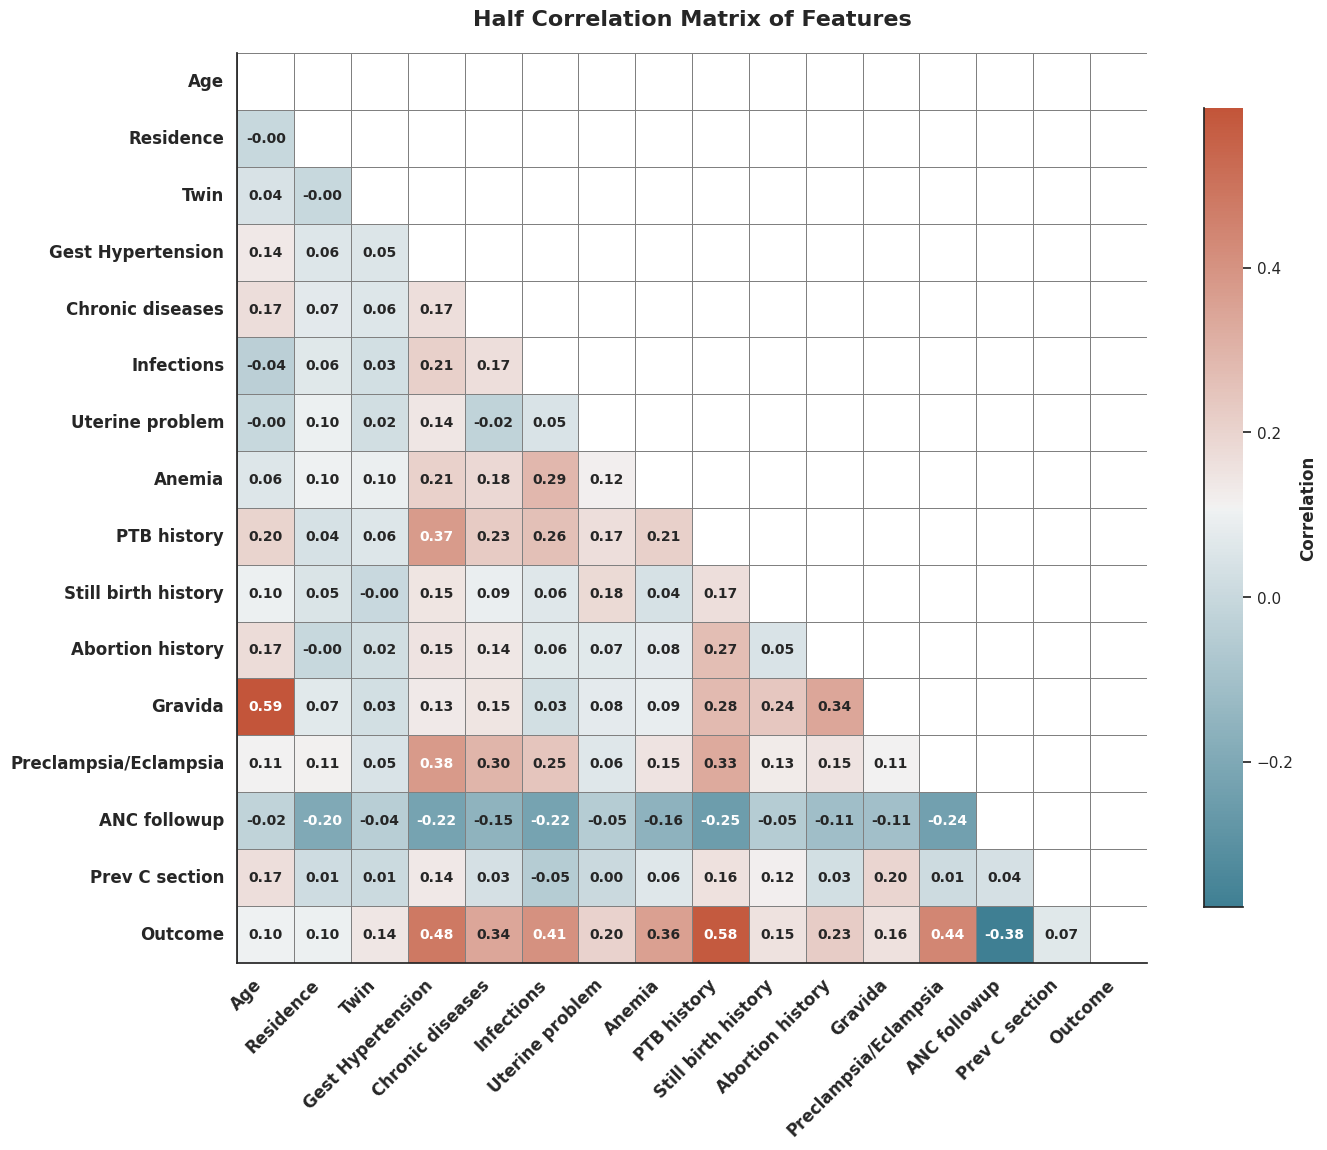

✅ Correlation heatmap saved as high-quality TIFF: figures/half_correlation_matrix.tiff


In [ ]:
# --- Ensure output folder exists ---
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Ensure 'Outcome' column is numeric (0 for Term, 1 for Preterm)
# This handles cases where it might have been converted to strings ('Term', 'Preterm')
data['Outcome'] = data['Outcome'].replace({'Term': 0.0, 'Preterm': 1.0})
data['Outcome'] = pd.to_numeric(data['Outcome'], errors='coerce').astype(float)

# Handle potential NaNs created by coercion (if any) after conversion
# Given previous imputation steps, re-imputing the whole DataFrame might be necessary
if data['Outcome'].isnull().any():
    print("NaN values found in 'Outcome' after coercing. Re-imputing...")
    if 'mice_imputer' in locals():
         data_imputed_array = mice_imputer.fit_transform(data)
         data = pd.DataFrame(data_imputed_array, columns=data.columns)
         print("Data after re-imputation:")
         print(data.isnull().sum())
    else:
        print("Warning: mice_imputer not found. Manual imputation of 'Outcome' NaNs skipped.")
        # Simple fillna if imputer is not available
        data['Outcome'] = data['Outcome'].fillna(data['Outcome'].mode()[0])

# Drop the 'Birth Outcome' column as it contains string values and is not needed for correlation
if 'Birth Outcome' in data.columns:
    data = data.drop('Birth Outcome', axis=1)


# --- Compute correlation matrix ---
corr_matrix = data.corr()

# --- Generate a mask for the upper triangle ---
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# --- plotting ---
plt.figure(figsize=(14, 12))
sns.set(style="white")

# Custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
ax = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True,
    linewidths=0.6,
    linecolor='gray',
    annot_kws={"size": 10, "weight": "bold"},
)

# Bold and readable labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12, fontweight='bold')

# Title
plt.title("Half Correlation Matrix of Features", fontsize=16, fontweight='bold', pad=20)

# Remove top/right spines for clean look
sns.despine(top=True, right=True, left=False, bottom=False)

# Tight layout
plt.tight_layout()

# Save high-resolution TIFF
save_path = os.path.join(output_dir, "half_correlation_matrix.tiff")
plt.savefig(save_path, dpi=600, bbox_inches="tight")
plt.show()

print(f"✅ Correlation heatmap saved as high-quality TIFF: {save_path}")

###Class Balancing

Class distribution graph

Class distribution for 'Outcome':
Outcome
0.0    954
1.0    402
Name: count, dtype: int64


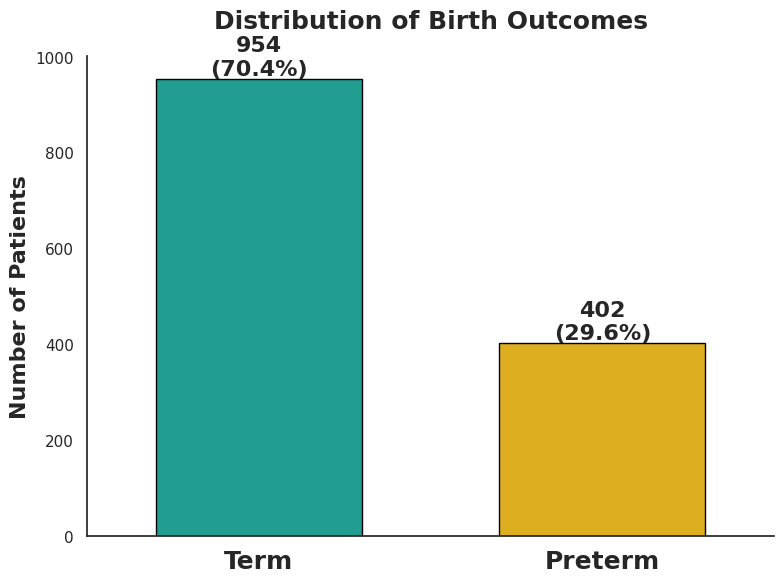

✅ Lancet-style distribution plot saved: figures/Outcome_distribution_lancet_style.tiff


In [ ]:
# --- Ensure output folder exists ---
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# --- Specify target column ---
target_column = 'Outcome'

if target_column in data.columns:
    # --- Compute class distribution ---
    class_distribution = data[target_column].value_counts().sort_index()
    total = class_distribution.sum()
    print(f"Class distribution for '{target_column}':")
    print(class_distribution)

    # --- Professional style ---
    sns.set_theme(style="white")
    plt.figure(figsize=(8, 6))

    # Colors: Term = teal, Preterm = amber
    palette = {0: "#0db2a2", 1: "#febd01"}

    # Barplot
    ax = sns.barplot(
        x=class_distribution.index,
        y=class_distribution.values,
        palette=[palette[val] for val in class_distribution.index],
        edgecolor='black',
        width=0.6
    )

    # Annotate counts + percentages
    for p, val in zip(ax.patches, class_distribution.values):
        height = p.get_height()
        percent = (val / total) * 100
        ax.annotate(
            f'{val:,}\n({percent:.1f}%)',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=16, fontweight='bold'
        )

    # Title and labels
    ax.set_title("Distribution of Birth Outcomes", fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel("", fontsize=0)  # remove default label
    ax.set_ylabel("Number of Patients", fontsize=16, fontweight='bold')

    # Replace tick labels with clinical terms
    ax.set_xticks(range(len(class_distribution.index)))
    ax.set_xticklabels(["Term", "Preterm"], fontsize=18, fontweight='bold')

    # Remove unnecessary spines
    sns.despine(left=False, bottom=False)

    # Remove gridlines for cleaner look
    ax.grid(False)

    plt.tight_layout()

    # Save high-resolution TIFF
    save_path = os.path.join(output_dir, f"{target_column}_distribution_lancet_style.tiff")
    plt.savefig(save_path, dpi=600, bbox_inches="tight", transparent=True)
    plt.show()

    print(f"✅ Lancet-style distribution plot saved: {save_path}")

else:
    print(f"Target column '{target_column}' not found in the DataFrame.")


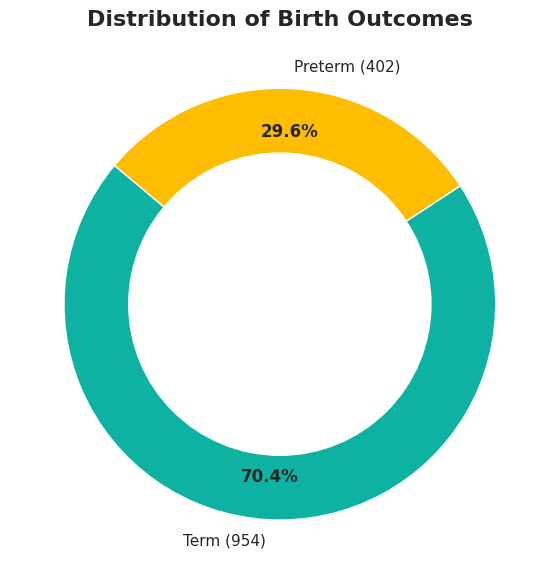

✅ Doughnut chart saved as figures/Outcome_distribution_doughnut.tiff


In [ ]:
# --- Get distribution ---
class_distribution = data['Outcome'].value_counts().sort_index()
total = class_distribution.sum()
labels = ["Term", "Preterm"]
colors = ["#0db2a2", "#febd01"]

# --- Pie chart with hole (doughnut) ---
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    class_distribution,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    colors=colors,
    pctdistance=0.8,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Add counts next to labels
for i, a in enumerate(autotexts):
    a.set_fontsize(12)
    a.set_weight("bold")
    texts[i].set_text(f"{labels[i]} ({class_distribution.values[i]:,})")  # Term (123)

# Draw center circle for doughnut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Birth Outcomes", fontsize=16, fontweight='bold')
plt.tight_layout()

# Save
save_path = os.path.join(output_dir, "Outcome_distribution_doughnut.tiff")
plt.savefig(save_path, dpi=600, bbox_inches="tight", transparent=True)
plt.show()

print(f"✅ Doughnut chart saved as {save_path}")


Data Split

In [ ]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Stratify to maintain class distribution
)


Data class balancing using SMOTEENN

In [ ]:

# --- Initialize SMOTE + ENN ---
smote_enn = SMOTEENN(random_state=42)

# --- Apply to training data ---
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# --- Check new class distribution ---
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

# --- Replace original training data ---
X_train = X_resampled
y_train = y_resampled


Original class distribution: Counter({0: 763, 1: 321})
Resampled class distribution: Counter({1: 584, 0: 556})


###Data Transformation

In [ ]:
# Initialize the PowerTransformer with the 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

###Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##MODEL DEVELOPMENT

###Model Training and Evaluation

ML models

In [ ]:
from huggingface_hub import login

# Please create your own HF_token for TabPFN in hugging face, otherwise It won't run
login()

In [ ]:
original_cols = [col for col in X.columns if col != 'Outcome']

X_train = pd.DataFrame(X_train, columns=original_cols)
X_test = pd.DataFrame(X_test, columns=original_cols)
# Clean column names
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = ["".join(c if c.isalnum() or c in ['_', '.'] else '_' for c in str(col)) for col in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() or c in ['_', '.'] else '_' for c in str(col)) for col in X_test.columns]

# Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🖥️ Using device: {device}")

# DEFINE MODELS
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "TabPFN": TabPFNClassifier(device=device, ignore_pretraining_limits=True),
}

# TRAINING AND EVALUATION
results = {}
max_train_samples = 1024

for name, model in models.items():
    print(f"\n🔧 Training {name}...")

    # Handle TabPFN sample limit
    if name == "TabPFN" and X_train.shape[0] > max_train_samples:
        X_train_sub = X_train.iloc[:max_train_samples]
        y_train_sub = y_train.iloc[:max_train_samples]
        model.fit(X_train_sub, y_train_sub)
    else:
        model.fit(X_train, y_train)

    # Predictions & probabilities
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]  # probability for positive class
    else:  # TabPFN
        y_proba = model.predict(X_test, return_type='probabilities')[:,1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_text = classification_report(y_test, y_pred)

    # Binary classification labels
    labels = [label for label in report_dict.keys() if label not in ['accuracy','macro avg','weighted avg']]
    if len(labels)==2:
        negative_label, positive_label = sorted(labels)
        try:
            sensitivity = report_dict[positive_label]['recall']
            specificity = report_dict[negative_label]['recall']
        except KeyError:
            sensitivity = specificity = float('nan')
    else:
        sensitivity = specificity = float('nan')

    # Save results
    results[name] = {
        "accuracy": acc,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "auc": auc_score,
        "report": report_text,
        "y_proba": y_proba
    }

    # --- ROC curve ---
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(7,6))
    plt.plot(fpr, tpr, color='#0db2a2', lw=3, label=f'ROC curve (AUC = {auc_score:.3f})')
    plt.plot([0,1], [0,1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    plt.title(f'ROC Curve — {name}', fontsize=16, fontweight='bold')
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f'ROC_{name}.tiff', dpi=600)
    plt.close()

# DISPLAY SUMMARY
print("\n" + "="*40)
print("📊 MULTI-MODEL PERFORMANCE SUMMARY")
print("="*40)
for name, res in results.items():
    print(f"\n🔹 {name}")
    print(f"✅ Accuracy   : {res['accuracy']:.4f}")
    print(f"📈 Sensitivity: {res['sensitivity']:.4f}")
    print(f"📉 Specificity: {res['specificity']:.4f}")
    print(f"🎯 AUC       : {res['auc']:.4f}")
    print("📋 Classification Report:")
    print(res['report'])


🖥️ Using device: cpu

🔧 Training Random Forest...

🔧 Training XGBoost...

🔧 Training CatBoost...

🔧 Training LightGBM...
[LightGBM] [Info] Number of positive: 584, number of negative: 556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512281 -> initscore=0.049133
[LightGBM] [Info] Start training from score 0.049133

🔧 Training TabPFN...

📊 MULTI-MODEL PERFORMANCE SUMMARY

🔹 Random Forest
✅ Accuracy   : 0.8566
📈 Sensitivity: 0.8765
📉 Specificity: 0.8482
🎯 AUC       : 0.9231
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       191
           1       0.71      0.88  

TabNet

In [ ]:
print("\n📌 TabNet Binary Classifier\n")
# TabNet requires numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples : {X_test.shape[0]}")

# DEVICE SETUP
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🖥️ Using device: {device}")

#MODEL DEFINITION
model = TabNetClassifier(
    device_name=device,
    verbose=0,
    optimizer_params=dict(lr=2e-2)
)

# 6. TRAINING
print("\n🔧 Training TabNet model...")
model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    patience=10,
    max_epochs=50
)
print("✅ Training complete.")

# PREDICTION
print("\n🔍 Evaluating model...")
y_pred = model.predict(X_test_np)

# Get predicted probabilities for AUC
y_proba = model.predict_proba(X_test_np)[:, 1]  # probability for positive class

# METRICS CALCULATION
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_text = classification_report(y_test, y_pred)

# Sensitivity and Specificity
labels = [label for label in report_dict.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
if len(labels) == 2:
    negative_label, positive_label = sorted(labels)
    try:
        sensitivity = report_dict[positive_label]['recall']    # True Positive Rate
        specificity = report_dict[negative_label]['recall']    # True Negative Rate
    except KeyError:
        sensitivity = specificity = float('nan')
else:
    print(f"⚠️ Unexpected number of labels: {labels}")
    sensitivity = specificity = float('nan')

# AUC
auc_score = roc_auc_score(y_test, y_proba)

#OUTPUT RESULTS
print("\n" + "="*40)
print("📊 MODEL PERFORMANCE")
print("="*40)
print(f"✅ Accuracy   : {accuracy:.4f}")
print(f"📈 Sensitivity: {sensitivity:.4f}")
print(f"📉 Specificity: {specificity:.4f}")
print(f"🎯 AUC        : {auc_score:.4f}")
print("\n📋 Full Classification Report:\n")
print(report_text)


📌 TabNet Binary Classifier

✅ Training samples: 1140
✅ Testing samples : 272
🖥️ Using device: cpu

🔧 Training TabNet model...

Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.88689
✅ Training complete.

🔍 Evaluating model...

📊 MODEL PERFORMANCE
✅ Accuracy   : 0.8419
📈 Sensitivity: 0.7901
📉 Specificity: 0.8639
🎯 AUC        : 0.8869

📋 Full Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       191
           1       0.71      0.79      0.75        81

    accuracy                           0.84       272
   macro avg       0.81      0.83      0.82       272
weighted avg       0.85      0.84      0.84       272



TabTransformer

In [ ]:
# ------------------ Data Preparation ------------------
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🖥️ Using device: {device}")

# ------------------ TabTransformer Definition ------------------
class TabTransformer(nn.Module):
    def __init__(self, num_features, num_classes, dim=32, depth=2, heads=4, attn_dropout=0.1, ff_dropout=0.1):
        super().__init__()
        self.embedding = nn.Linear(num_features, dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=dim, nhead=heads, dim_feedforward=dim*4, dropout=attn_dropout, batch_first=True
            ),
            num_layers=depth
        )
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, x):
        x = self.embedding(x.float())
        x = self.transformer(x.unsqueeze(1)).squeeze(1)
        return self.mlp_head(x)

# ------------------ Model Initialization ------------------
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
tab_transformer = TabTransformer(num_features, num_classes).to(device)

optimizer = torch.optim.Adam(tab_transformer.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# ------------------ Training Loop ------------------
epochs = 50
for epoch in range(epochs):
    tab_transformer.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = tab_transformer(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {loss.item():.4f}")

# ------------------ Evaluation ------------------
tab_transformer.eval()
all_preds, all_probs = [], []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = tab_transformer(inputs)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

y_true = y_test_tensor.numpy()
y_pred = np.array(all_preds)
y_proba = np.array(all_probs)

# ------------------ Metrics Computation (same logic as Code 1) ------------------
if len(np.unique(y_true)) == 2:
    # --- Binary classification ---
    y_proba_pos = y_proba[:, 1]

    # Classification report
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_text = classification_report(y_true, y_pred)

    # Identify labels
    labels = [label for label in report_dict.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
    negative_label, positive_label = sorted(labels)

    # Sensitivity (recall of positive class)
    sensitivity = report_dict[positive_label]['recall']

    # Specificity (recall of negative class)
    specificity = report_dict[negative_label]['recall']

    acc = accuracy_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba_pos)

else:
    # --- Multi-class case ---
    sensitivity = float('nan')
    specificity = float('nan')
    acc = accuracy_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba, multi_class='ovr', average='weighted')
    report_text = classification_report(y_true, y_pred)

# ------------------ Results Summary ------------------
metrics = {
    "Accuracy": acc,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "AUC": auc_score,
    "Classification Report": report_text
}

print("\n" + "="*40)
print("📊 TABTRANSFORMER PERFORMANCE SUMMARY")
print("="*40)
for k, v in metrics.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}:\n{v}")


🖥️ Using device: cpu
Epoch 1/50 - Loss: 0.3695
Epoch 2/50 - Loss: 0.6135
Epoch 3/50 - Loss: 0.2023
Epoch 4/50 - Loss: 0.4417
Epoch 5/50 - Loss: 0.2252
Epoch 6/50 - Loss: 0.2654
Epoch 7/50 - Loss: 0.0774
Epoch 8/50 - Loss: 0.1289
Epoch 9/50 - Loss: 0.1240
Epoch 10/50 - Loss: 0.1418
Epoch 11/50 - Loss: 0.1942
Epoch 12/50 - Loss: 0.0972
Epoch 13/50 - Loss: 0.1967
Epoch 14/50 - Loss: 0.0858
Epoch 15/50 - Loss: 0.0843
Epoch 16/50 - Loss: 0.3498
Epoch 17/50 - Loss: 0.1258
Epoch 18/50 - Loss: 0.2207
Epoch 19/50 - Loss: 0.0840
Epoch 20/50 - Loss: 0.2088
Epoch 21/50 - Loss: 0.2788
Epoch 22/50 - Loss: 0.0646
Epoch 23/50 - Loss: 0.2761
Epoch 24/50 - Loss: 0.4109
Epoch 25/50 - Loss: 0.0790
Epoch 26/50 - Loss: 0.1841
Epoch 27/50 - Loss: 0.1276
Epoch 28/50 - Loss: 0.0347
Epoch 29/50 - Loss: 0.1610
Epoch 30/50 - Loss: 0.3518
Epoch 31/50 - Loss: 0.0293
Epoch 32/50 - Loss: 0.0256
Epoch 33/50 - Loss: 0.0186
Epoch 34/50 - Loss: 0.0093
Epoch 35/50 - Loss: 0.2919
Epoch 36/50 - Loss: 0.3225
Epoch 37/50 - Lo

TabM

In [ ]:
# ------------------ Data Preparation ------------------
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"🖥️ Using device: {device}")

# ------------------ Define TabM (MLP-based Model) ------------------
class TabM(nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.layers(x.float())

# ------------------ Model Initialization ------------------
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
tab_m_model = TabM(num_features, num_classes).to(device)

optimizer = torch.optim.Adam(tab_m_model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# ------------------ Training Loop ------------------
epochs = 50
for epoch in range(epochs):
    tab_m_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = tab_m_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# ------------------ Evaluation ------------------
tab_m_model.eval()
all_preds, all_probs = [], []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = tab_m_model(inputs)
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(probs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

y_true = y_test_tensor.numpy()
y_pred = np.array(all_preds)
y_proba = np.array(all_probs)

# ------------------ Metrics Computation (same logic as Code 1) ------------------
if len(np.unique(y_true)) == 2:
    # --- Binary classification ---
    y_proba_pos = y_proba[:, 1]

    # Classification report
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_text = classification_report(y_true, y_pred)

    # Identify labels
    labels = [label for label in report_dict.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
    negative_label, positive_label = sorted(labels)

    # Sensitivity (recall of positive class)
    sensitivity = report_dict[positive_label]['recall']

    # Specificity (recall of negative class)
    specificity = report_dict[negative_label]['recall']

    acc = accuracy_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba_pos)

else:
    # --- Multi-class case ---
    sensitivity = float('nan')
    specificity = float('nan')
    acc = accuracy_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_proba, multi_class='ovr', average='weighted')
    report_text = classification_report(y_true, y_pred)

# ------------------ Results Summary ------------------
metrics = {
    "Accuracy": acc,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "AUC": auc_score,
    "Classification Report": report_text
}

print("\n" + "="*40)
print("📊 TABM (MLP) PERFORMANCE SUMMARY")
print("="*40)
for k, v in metrics.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")
    else:
        print(f"{k}:\n{v}")


🖥️ Using device: cpu
Epoch 1/50 - Loss: 0.3892
Epoch 2/50 - Loss: 0.2643
Epoch 3/50 - Loss: 0.2408
Epoch 4/50 - Loss: 0.2224
Epoch 5/50 - Loss: 0.2127
Epoch 6/50 - Loss: 0.2105
Epoch 7/50 - Loss: 0.2037
Epoch 8/50 - Loss: 0.2023
Epoch 9/50 - Loss: 0.1979
Epoch 10/50 - Loss: 0.1770
Epoch 11/50 - Loss: 0.1827
Epoch 12/50 - Loss: 0.1752
Epoch 13/50 - Loss: 0.1697
Epoch 14/50 - Loss: 0.1738
Epoch 15/50 - Loss: 0.1643
Epoch 16/50 - Loss: 0.1612
Epoch 17/50 - Loss: 0.1612
Epoch 18/50 - Loss: 0.1529
Epoch 19/50 - Loss: 0.1566
Epoch 20/50 - Loss: 0.1494
Epoch 21/50 - Loss: 0.1408
Epoch 22/50 - Loss: 0.1435
Epoch 23/50 - Loss: 0.1408
Epoch 24/50 - Loss: 0.1514
Epoch 25/50 - Loss: 0.1417
Epoch 26/50 - Loss: 0.1320
Epoch 27/50 - Loss: 0.1298
Epoch 28/50 - Loss: 0.1225
Epoch 29/50 - Loss: 0.1182
Epoch 30/50 - Loss: 0.1202
Epoch 31/50 - Loss: 0.1165
Epoch 32/50 - Loss: 0.1212
Epoch 33/50 - Loss: 0.1139
Epoch 34/50 - Loss: 0.1180
Epoch 35/50 - Loss: 0.1114
Epoch 36/50 - Loss: 0.1146
Epoch 37/50 - Lo

###Model Performance Visualization

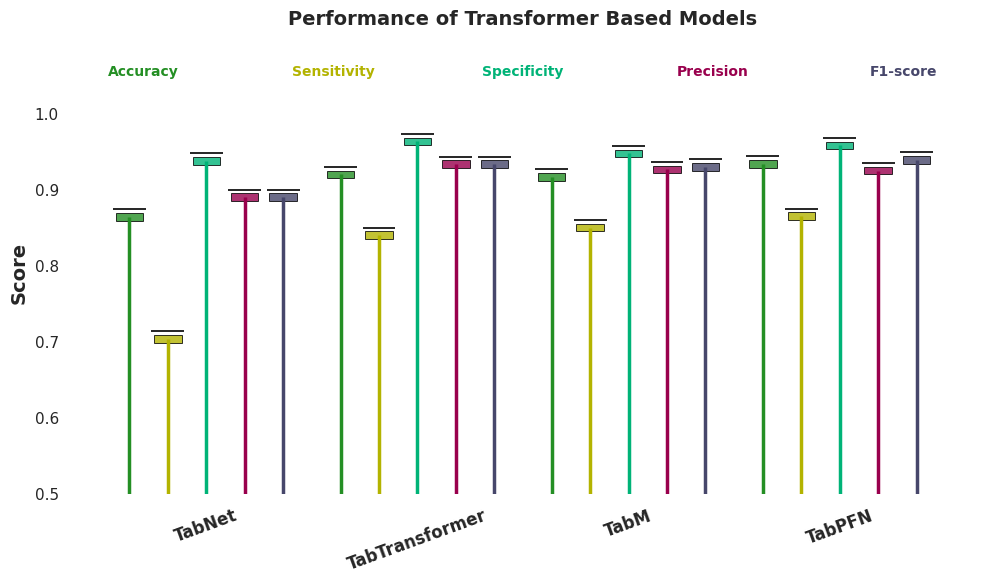

In [ ]:
# --- Model performance data ---
data = {
    'Model': ['TabNet', 'TabTransformer', 'TabM', 'TabPFN'],
    'Accuracy': [0.8640, 0.9201, 0.9165, 0.9338],
    'Sensitivity': [0.7037, 0.8401, 0.85, 0.865],
    'Specificity': [0.9376, 0.9634, 0.9476,0.9581],
    'Precision': [0.89, 0.9333, 0.9265, 0.925],
    'F1-score': [0.89, 0.9333, 0.9299,0.939]
}

df = pd.DataFrame(data)

# --- Figure setup ---
plt.figure(figsize=(10, 6))
index = np.arange(len(df['Model']))
width = 0.13  # candle body width

# --- Colors for each metric ---
colors = ['#248f24', '#b3b300', '#00b377', '#99004d', '#47476b']
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']

# --- Plot bars ---
for i, metric in enumerate(metrics):
    offset = (i - 2) * width * 1.4   # shift each metric around the model
    x_positions = index + offset

    # Candle body (±0.005 around the metric value)
    body_bottom = df[metric] - 0.005
    body_top = df[metric] + 0.005
    plt.bar(
        x_positions,
        body_top - body_bottom,
        bottom=body_bottom,
        width=width,
        color=colors[i],
        alpha=0.8,
        edgecolor="black",
        linewidth=0.7
    )

    # Wick line (0 up to metric value)
    plt.vlines(x_positions, ymin=0, ymax=df[metric], color=colors[i], linewidth=2.5)

    # T-shaped cap on top
    cap_size = width * 1.2
    plt.hlines(df[metric] + 0.01, x_positions - cap_size / 2, x_positions + cap_size / 2,
               color="black", linewidth=1.2)

# --- Add spaced metric names on top (colored) ---
x_min = index[0] - 0.3
x_max = index[-1] + 0.3
label_x_positions = np.linspace(x_min, x_max, len(metrics))

for x, metric, color in zip(label_x_positions, metrics, colors):
    plt.text(x, 1.045, metric, ha='center', va='bottom',
             fontsize=10, fontweight='bold', rotation=0, color=color)

# --- Axis labels and title ---
plt.xticks(index, df['Model'],rotation = 20, fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.ylim(0.5, 1.08)  # add vertical space for metric names
plt.title('Performance of Transformer Based Models', fontsize=14, fontweight='bold', pad=20)
plt.box(False)

# --- Tight layout ---
plt.tight_layout()

# --- Save high-resolution figure ---
plt.savefig('tabular_models_candlestick_colored_metric_labels.tiff', dpi=600, bbox_inches='tight')
plt.show()


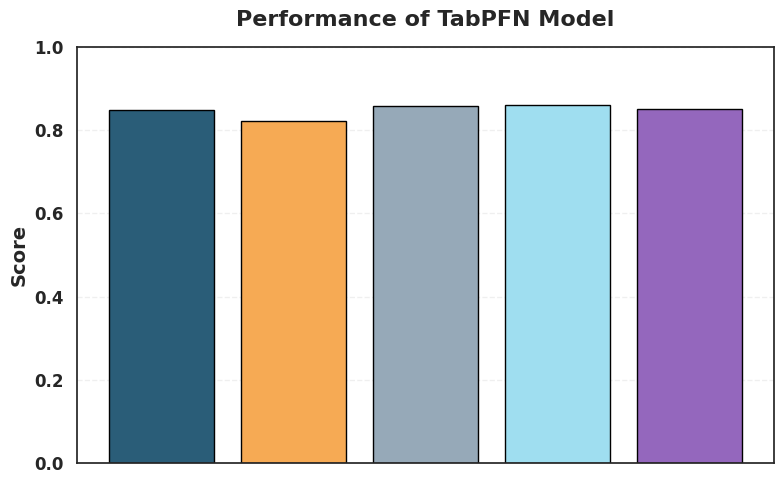

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Model performance data ---
data = {
    'Model': ['TabPFN'],
    'Accuracy': [0.8493],
    'Sensitivity': [0.8212],
    'Specificity': [0.8586],
    'Precision': [0.861],
    'F1-score': [0.85]
}

df = pd.DataFrame(data)

# --- Metrics and values ---
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']
values = df.loc[0, metrics].values

# --- Colors ---
colors = ['#2a5d78', '#f6aa54', '#96a9b8', '#9fdef0', '#9467bd']

# --- Plot ---
plt.figure(figsize=(8,5))
plt.bar(range(len(values)), values, color=colors, edgecolor='black')

# Remove x-axis labels and ticks
plt.xticks([])

# Y-axis settings
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=14, fontweight='bold')  # bold y-axis label
plt.yticks(fontsize=12, fontweight='bold')          # bold y-axis ticks

# Add title
plt.title('Performance of TabPFN Model', fontsize=16, fontweight='bold', pad=15)

# Optional: y-grid
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('TabPFN_performance_bar_with_title.tiff', dpi=600, bbox_inches='tight')
plt.show()


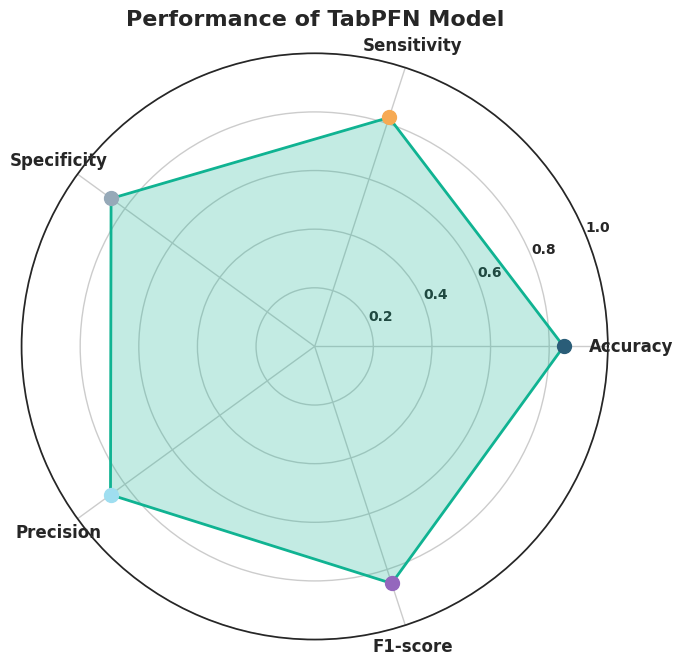

In [ ]:
# --- Model performance data ---
data = {
    'Model': ['TabPFN'],
    'Accuracy': [0.8493],
    'Sensitivity': [0.8212],
    'Specificity': [0.8586],
    'Precision': [0.861],
    'F1-score': [0.85]
}

df = pd.DataFrame(data)

# --- Metrics and values ---
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']
values = df.loc[0, metrics].values

# --- Radar chart setup ---
num_metrics = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))  # close the loop
angles += angles[:1]  # close the loop

colors = ['#2a5d78', '#f6aa54', '#96a9b8', '#9fdef0', '#9467bd']

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

# Plot data
ax.plot(angles, values, color='#10b392', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='#10b392', alpha=0.25)

# Add individual points with colors
for i, angle in enumerate(angles[:-1]):
    ax.plot(angle, values[i], 'o', color=colors[i], markersize=10)

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')

# Y-axis range
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels([0.2,0.4,0.6,0.8,1.0], fontsize=10, fontweight='bold')

# Title
plt.title('Performance of TabPFN Model', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('TabPFN_performance_radar.tiff', dpi=600, bbox_inches='tight')
plt.show()


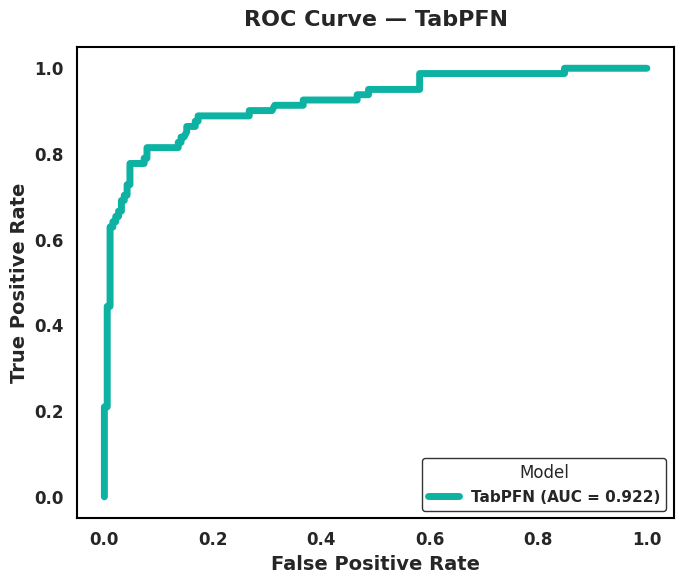

In [ ]:
# --- Extract TabPFN predictions and probabilities ---
tabpfn_results = results['TabPFN']
y_proba = tabpfn_results['y_proba']

# Compute ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# --- Plot ROC ---
plt.figure(figsize=(7,6))

# Bold/thick ROC line
plt.plot(
    fpr,
    tpr,
    color='#0db2a2',    # ROC line color
    lw=5,               # thicker line for bold effect
    label=f'TabPFN (AUC = {auc_score:.3f})'
)

# Axes labels
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')

# Title
plt.title('ROC Curve — TabPFN', fontsize=16, fontweight='bold', pad=15)

# Ticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Legend with bold text
plt.legend(
    loc='lower right',
    fontsize=12,
    title='Model',
    title_fontsize=12,
    frameon=True,
    edgecolor='black',
    prop={'weight':'bold'}
)

# Remove grid
plt.grid(False)

# Draw box/frame around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    spine.set_color('black')

plt.tight_layout()
plt.savefig('ROC_TabPFN_final_publication.tiff', dpi=600, bbox_inches='tight')
plt.show()


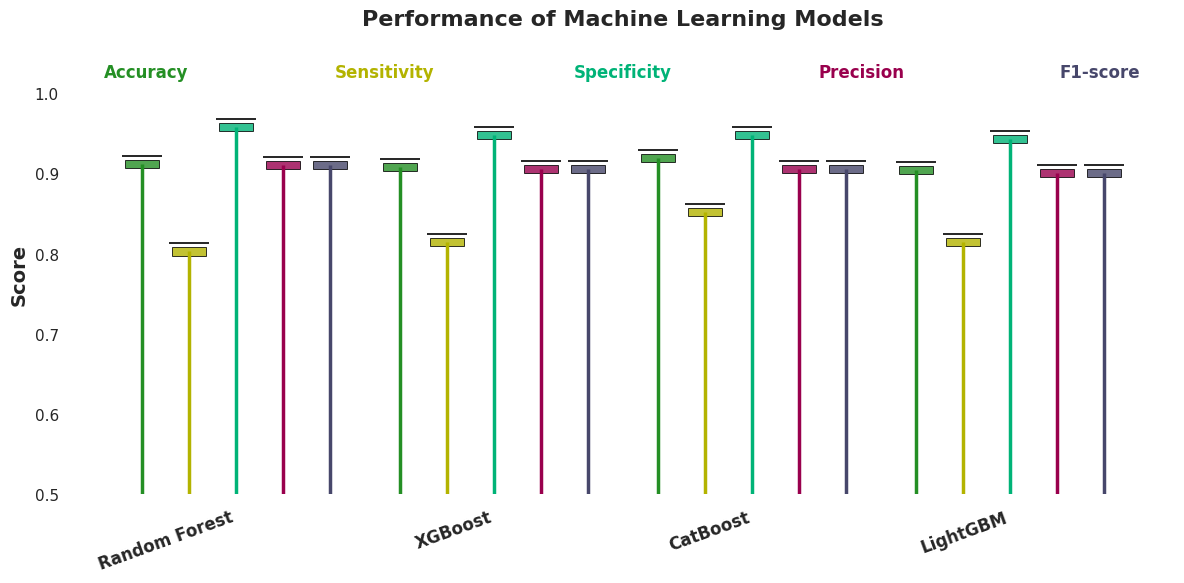

In [ ]:
# --- Model performance data ---
data = {
    'Model': ['Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
    'Accuracy': [0.9118, 0.9081, 0.9191, 0.9044],
    'Sensitivity': [0.8025, 0.8148, 0.8519, 0.8148],
    'Specificity': [0.9581, 0.9476, 0.9476, 0.9424],
    'Precision': [0.91, 0.905, 0.905, 0.90],
    'F1-score': [0.91, 0.905, 0.905, 0.90]
}

df = pd.DataFrame(data)

# --- Figure setup ---
plt.figure(figsize=(12, 6))
index = np.arange(len(df['Model']))
width = 0.13  # candle body width

# --- Colors for each metric ---
colors = ['#248f24', '#b3b300', '#00b377', '#99004d', '#47476b']
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']

# --- Plot candlesticks ---
for i, metric in enumerate(metrics):
    offset = (i - 2) * width * 1.4   # spread them out per model
    x_positions = index + offset

    # Candle body (rectangle around the metric value ±0.005)
    body_bottom = df[metric] - 0.005
    body_top = df[metric] + 0.005
    plt.bar(
        x_positions,
        body_top - body_bottom,
        bottom=body_bottom,
        width=width,
        color=colors[i],
        alpha=0.8,
        edgecolor="black",
        linewidth=0.7
    )

    # Wick line (0 up to metric value)
    plt.vlines(x_positions, ymin=0, ymax=df[metric], color=colors[i], linewidth=2.5)

    # T-shaped cap at the top
    cap_size = width * 1.2
    plt.hlines(df[metric] + 0.01, x_positions - cap_size / 2, x_positions + cap_size / 2,
               color="black", linewidth=1.2)

# --- Add spaced metric names on top (colored) ---
x_min = index[0] - 0.35
x_max = index[-1] + 0.35
label_x_positions = np.linspace(x_min, x_max, len(metrics))

for x, metric, color in zip(label_x_positions, metrics, colors):
    plt.text(x, 1.015, metric, ha='center', va='bottom',
             fontsize=12, fontweight='bold', rotation=0, color=color)

# --- Labels and title ---
plt.xticks(index, df['Model'], rotation=20, ha='right', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.ylim(0.5, 1.05)  # Increased to make room for colored labels
plt.title('Performance of Machine Learning Models', fontsize=16, fontweight='bold', pad=20)


# --- Clean style ---
#plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.box(False)

plt.tight_layout()
plt.savefig('ml_models_candlestick_colored_labels.tiff', dpi=600, bbox_inches='tight')
plt.show()


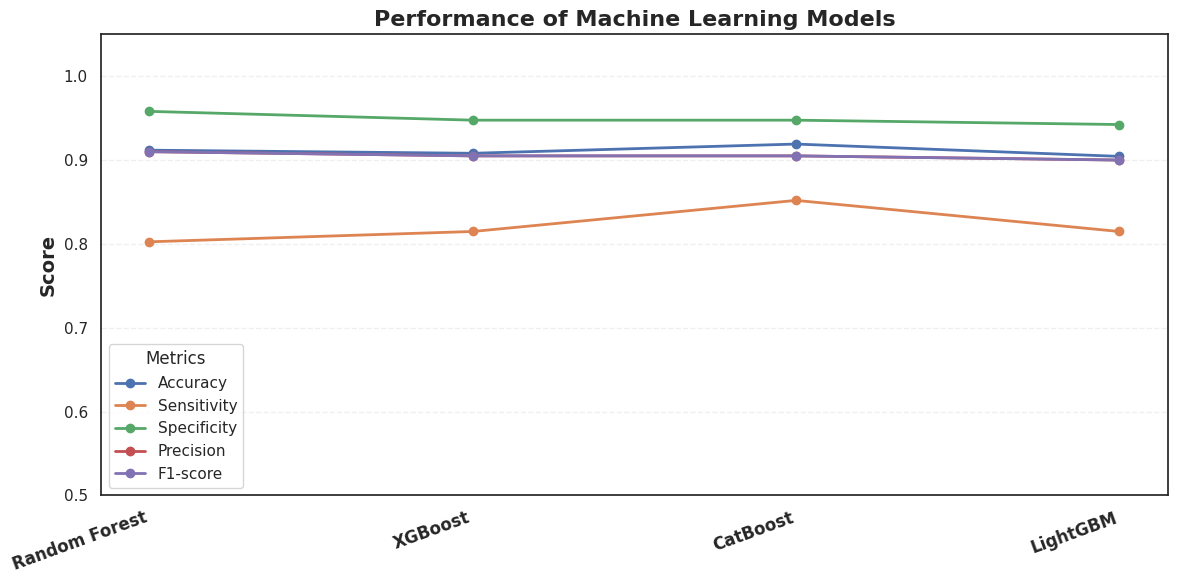

In [ ]:
# --- Model performance data ---
data = {
    'Model': ['Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'],
    'Accuracy': [0.9118, 0.9081, 0.9191, 0.9044],
    'Sensitivity': [0.8025, 0.8148, 0.8519, 0.8148],
    'Specificity': [0.9581, 0.9476, 0.9476, 0.9424],
    'Precision': [0.91, 0.905, 0.905, 0.90],
    'F1-score': [0.91, 0.905, 0.905, 0.90]
}

df = pd.DataFrame(data)

# --- Basic setup ---
plt.figure(figsize=(12, 6))

metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1-score']

# --- Plot each metric as a line ---
for metric in metrics:
    plt.plot(df['Model'], df[metric], marker='o', linewidth=2, label=metric)

# --- Labels and title ---
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.ylim(0.5, 1.05)
plt.title('Performance of Machine Learning Models', fontsize=16, fontweight='bold')
plt.xticks(rotation=20, ha='right', fontsize=12, fontweight='bold')

# --- Legend & layout ---
plt.legend(title="Metrics", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Save
plt.savefig('ml_models_linegraph.tiff', dpi=600, bbox_inches='tight')

# Display
plt.show()


ROC Curve

**Confusion matrix for the best performing model**

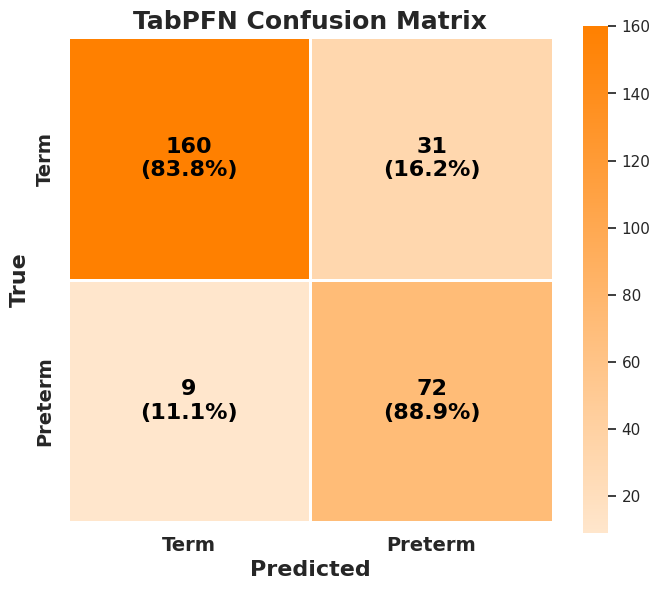

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# ---- soft custom colormap ----
colors = ["#ffe6cc", "#ff8000"]  # light to strong orange
cmap_custom = LinearSegmentedColormap.from_list("custom_orange", colors)

# ---- plot figure ----
plt.figure(figsize=(7,6))

ax = sns.heatmap(
    cm,
    annot=annot,
    fmt='',
    cmap=cmap_custom,
    cbar=True,
    xticklabels=tick_labels,
    yticklabels=tick_labels,
    linewidths=0.8,
    linecolor='white',
    square=True,
    annot_kws={"size":16, "weight":"bold", "color":"black"}  # bold annotations
)

# ---- axis labels and title ----
ax.set_xlabel("Predicted", fontsize=16, fontweight='bold')
ax.set_ylabel("True", fontsize=16, fontweight='bold')
ax.set_title("TabPFN Confusion Matrix", fontsize=18, fontweight='bold')

# ---- tick labels bold and readable ----
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
